In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria produtos

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 224"
       )
tweets = query(cmd)
print(len(tweets))

18049


In [3]:
print(tweets[:20])

[('If you have missing roots, dental implants are the most common way to fix your tooth. https://t.co/Bg9ia6NXFp https://t.co/Q5rIiSdhhF',), ('Did you know! Dental Implants are the most significant Dental Innovation of our generation! It has best Long-Term... https://t.co/TBwDMwPGTy',), ('Check out Dental implant torque wrench Nobel Biocare #totalimplant https://t.co/hn4Bbl7iWM via @eBay',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen #totalimplant https://t.co/R4y2Qp08ZK via @eBay',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay',), ('3 dental implants with Bone Grafting https://t.co/zKftBFMgMI',), ('Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay',), ('3 dental implants with Bone graft https://t.co/TGH02FUc6y',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Comp #totalimpla

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

18049


In [6]:
for d in doc_complete[:20]:
    print(d)

if you have missing roots dental implants are the most common way to fix your tooth 
did you know dental implants are the most significant dental innovation of our generation it has best long term 
check out dental implant torque wrench nobel biocare totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen compatible 
 dental implants with bone grafting 
dental implant torque wrench nobel biocare implantdirect hiossen compatible 
 dental implants with bone graft 
check out dental implant torque wrench nobel biocare implantdirect hiossen comp totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen dds totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen dds tool totalimplant 
check out dental implant torque wrench nobel biocare implantdirect dds tool totalimplant 
check out dental implant torque wren

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


7219.6
('bone', 1749)
('know', 1492)
('torque', 1304)
('wrench', 1298)
('titanium', 1148)
('check', 1124)
('straumann', 992)
('teeth', 934)
('announce', 930)
('alsgd', 915)
('nobel', 868)
('reduction', 795)
('handpiece', 746)
('systems', 740)
('system', 736)
('success', 725)
('biocare', 720)
('contra', 672)
('angle', 668)
('restoration', 618)
('need', 612)
('rate', 586)
('technology', 565)
('tooth', 561)
('graft', 550)
('mouth', 546)
('ceramic', 541)
('grafting', 521)
('placement', 517)
('adin', 497)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['missing', 'roots', 'common', 'tooth']
['know', 'significant', 'innovation', 'generation', 'best', 'long', 'term']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'compatible']
['bone', 'grafting']
['torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'compatible']
['bone', 'graft']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'comp', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'tool', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'tool', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'tool', 'totalimplant']
['break', 'drill', 'bone', 'graft', 'firstworld

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<18049x6394 sparse matrix of type '<class 'numpy.int32'>'
	with 97113 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [17]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 30
INFO:lda:n_words: 98337
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 10
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 60
INFO:lda:n_words: 98337
INFO:lda:n_topics: 90
INFO:l

INFO:lda:<80> log likelihood: -604212
INFO:lda:<30> log likelihood: -575407
INFO:lda:<50> log likelihood: -580463
INFO:lda:<20> log likelihood: -596882
INFO:lda:<90> log likelihood: -603459
INFO:lda:<40> log likelihood: -572634
INFO:lda:<10> log likelihood: -649688
INFO:lda:<20> log likelihood: -594621
INFO:lda:<30> log likelihood: -573651
INFO:lda:<40> log likelihood: -569247
INFO:lda:<100> log likelihood: -603193
INFO:lda:<60> log likelihood: -578587
INFO:lda:<10> log likelihood: -653087
INFO:lda:<110> log likelihood: -602787
INFO:lda:<50> log likelihood: -568917
INFO:lda:<40> log likelihood: -566431
INFO:lda:<20> log likelihood: -597835
INFO:lda:<20> log likelihood: -602055
INFO:lda:<120> log likelihood: -602652
INFO:lda:<70> log likelihood: -577337
INFO:lda:<20> log likelihood: -598639
INFO:lda:<50> log likelihood: -562630
INFO:lda:<10> log likelihood: -652770
INFO:lda:<60> log likelihood: -566993
INFO:lda:<130> log likelihood: -602159
INFO:lda:<80> log likelihood: -575119
INFO:lda

INFO:lda:<350> log likelihood: -569969
INFO:lda:<520> log likelihood: -599875
INFO:lda:<110> log likelihood: -544025
INFO:lda:<290> log likelihood: -555426
INFO:lda:<530> log likelihood: -599541
INFO:lda:<180> log likelihood: -542608
INFO:lda:<360> log likelihood: -569843
INFO:lda:<120> log likelihood: -541813
INFO:lda:<220> log likelihood: -549400
INFO:lda:<130> log likelihood: -540929
INFO:lda:<540> log likelihood: -599782
INFO:lda:<100> log likelihood: -542506
INFO:lda:<370> log likelihood: -569991
INFO:lda:<550> log likelihood: -600138
INFO:lda:<300> log likelihood: -555796
INFO:lda:<40> log likelihood: -574487
INFO:lda:<170> log likelihood: -540389
INFO:lda:<190> log likelihood: -542353
INFO:lda:<50> log likelihood: -565412
INFO:lda:<560> log likelihood: -599578
INFO:lda:<230> log likelihood: -548883
INFO:lda:<380> log likelihood: -569706
INFO:lda:<570> log likelihood: -599741
INFO:lda:<310> log likelihood: -555473
INFO:lda:<120> log likelihood: -543188
INFO:lda:<140> log likeliho

INFO:lda:<240> log likelihood: -536122
INFO:lda:<980> log likelihood: -598099
INFO:lda:<410> log likelihood: -547756
INFO:lda:<80> log likelihood: -551875
INFO:lda:<660> log likelihood: -568550
INFO:lda:<340> log likelihood: -540821
INFO:lda:<520> log likelihood: -554042
INFO:lda:<990> log likelihood: -598398
INFO:lda:<90> log likelihood: -548985
INFO:lda:<1000> log likelihood: -598159
INFO:lda:<70> log likelihood: -557573
INFO:lda:<100> log likelihood: -545180
INFO:lda:<120> log likelihood: -541289
INFO:lda:<670> log likelihood: -568656
INFO:lda:<420> log likelihood: -547489
INFO:lda:<220> log likelihood: -535751
INFO:lda:<150> log likelihood: -536769
INFO:lda:<530> log likelihood: -553688
INFO:lda:<1010> log likelihood: -598113
INFO:lda:<290> log likelihood: -538427
INFO:lda:<680> log likelihood: -568066
INFO:lda:<350> log likelihood: -540503
INFO:lda:<1020> log likelihood: -598030
INFO:lda:<250> log likelihood: -535817
INFO:lda:<180> log likelihood: -535714
INFO:lda:<540> log likeli

INFO:lda:<1440> log likelihood: -598065
INFO:lda:<410> log likelihood: -537648
INFO:lda:<170> log likelihood: -536019
INFO:lda:<960> log likelihood: -568118
INFO:lda:<500> log likelihood: -539713
INFO:lda:<1450> log likelihood: -598064
INFO:lda:<250> log likelihood: -533015
INFO:lda:<610> log likelihood: -547009
INFO:lda:<1460> log likelihood: -597734
INFO:lda:<740> log likelihood: -553887
INFO:lda:<130> log likelihood: -541890
INFO:lda:<970> log likelihood: -568104
INFO:lda:<210> log likelihood: -534248
INFO:lda:<1470> log likelihood: -597683
INFO:lda:<350> log likelihood: -534243
INFO:lda:<290> log likelihood: -533991
INFO:lda:<320> log likelihood: -533099
INFO:lda:<1480> log likelihood: -597891
INFO:lda:<980> log likelihood: -568269
INFO:lda:<750> log likelihood: -553554
INFO:lda:<510> log likelihood: -540056
INFO:lda:<620> log likelihood: -547057
INFO:lda:<420> log likelihood: -537200
INFO:lda:<1490> log likelihood: -597683
INFO:lda:<990> log likelihood: -568481
INFO:lda:<120> log 

INFO:lda:<1260> log likelihood: -568025
INFO:lda:<460> log likelihood: -533232
INFO:lda:<960> log likelihood: -552815
INFO:lda:<170> log likelihood: -537912
INFO:lda:<650> log likelihood: -539431
INFO:lda:<1880> log likelihood: -597321
INFO:lda:<1270> log likelihood: -568182
INFO:lda:<540> log likelihood: -536837
INFO:lda:<1890> log likelihood: -597390
INFO:lda:<970> log likelihood: -552874
INFO:lda:<800> log likelihood: -546425
INFO:lda:<420> log likelihood: -531769
INFO:lda:<1900> log likelihood: -597459
INFO:lda:<1280> log likelihood: -567360
INFO:lda:<660> log likelihood: -539605
INFO:lda:<230> log likelihood: -532788
INFO:lda:<380> log likelihood: -533017
INFO:lda:<1910> log likelihood: -597508
INFO:lda:<980> log likelihood: -552738
INFO:lda:<470> log likelihood: -532801
INFO:lda:<190> log likelihood: -536756
INFO:lda:<1290> log likelihood: -567497
INFO:lda:<1920> log likelihood: -597554
INFO:lda:<810> log likelihood: -545942
INFO:lda:<330> log likelihood: -530607
INFO:lda:<550> l

INFO:lda:<810> log likelihood: -539056
INFO:lda:<340> log likelihood: -530293
INFO:lda:<680> log likelihood: -536297
INFO:lda:<1600> log likelihood: -567398
INFO:lda:<1220> log likelihood: -553111
INFO:lda:<530> log likelihood: -530588
INFO:lda:<1610> log likelihood: -567572
INFO:lda:<470> log likelihood: -531060
INFO:lda:<1000> log likelihood: -546171
INFO:lda:<1230> log likelihood: -552734
INFO:lda:<290> log likelihood: -531425
INFO:lda:<590> log likelihood: -532965
INFO:lda:<820> log likelihood: -539296
INFO:lda:<690> log likelihood: -536055
INFO:lda:<1620> log likelihood: -567446
INFO:lda:<170> log likelihood: -540607
INFO:lda:<410> log likelihood: -530487
INFO:lda:<1240> log likelihood: -552714
INFO:lda:<1630> log likelihood: -567301
INFO:lda:<1010> log likelihood: -545625
INFO:lda:<240> log likelihood: -534267
INFO:lda:<220> log likelihood: -534960
INFO:lda:<350> log likelihood: -530803
INFO:lda:<700> log likelihood: -536359
INFO:lda:<480> log likelihood: -531203
INFO:lda:<540> l

INFO:lda:<1970> log likelihood: -567013
INFO:lda:<1230> log likelihood: -546339
INFO:lda:<1490> log likelihood: -552371
INFO:lda:<500> log likelihood: -529473
INFO:lda:<650> log likelihood: -530557
INFO:lda:<580> log likelihood: -530645
INFO:lda:<1980> log likelihood: -567118
INFO:lda:<720> log likelihood: -533056
INFO:lda:<1240> log likelihood: -545999
INFO:lda:<1500> log likelihood: -552194
INFO:lda:<270> log likelihood: -532799
INFO:lda:<1000> log likelihood: -538977
INFO:lda:<860> log likelihood: -535883
INFO:lda:<1990> log likelihood: -567812
INFO:lda:<1510> log likelihood: -552126
INFO:lda:<660> log likelihood: -530416
INFO:lda:<1250> log likelihood: -545687
INFO:lda:<1999> log likelihood: -567506
INFO:lda:<210> log likelihood: -538451
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -567812.284071
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.038525
INFO:lda:<300> log likelihood: -531766
INFO:tmtoolkit:> evaluation result with metric "arun_2010

INFO:lda:<870> log likelihood: -531902
INFO:lda:<1800> log likelihood: -552758
INFO:lda:<90> log likelihood: -554408
INFO:lda:<1490> log likelihood: -545435
INFO:lda:<600> log likelihood: -528827
INFO:lda:<1810> log likelihood: -552505
INFO:lda:<1500> log likelihood: -545539
INFO:lda:<1210> log likelihood: -538572
INFO:lda:<30> log likelihood: -588132
INFO:lda:<700> log likelihood: -530245
INFO:lda:<1030> log likelihood: -535512
INFO:lda:<430> log likelihood: -530139
INFO:lda:<880> log likelihood: -532028
INFO:lda:<790> log likelihood: -529586
INFO:lda:<1820> log likelihood: -552330
INFO:lda:<1510> log likelihood: -545203
INFO:lda:<290> log likelihood: -534154
INFO:lda:<1040> log likelihood: -535954
INFO:lda:<1220> log likelihood: -538624
INFO:lda:<1830> log likelihood: -551901
INFO:lda:<330> log likelihood: -530532
INFO:lda:<610> log likelihood: -528913
INFO:lda:<520> log likelihood: -528437
INFO:lda:<1520> log likelihood: -545701
INFO:lda:<800> log likelihood: -529898
INFO:lda:<890> 

INFO:lda:<820> log likelihood: -529745
INFO:lda:<930> log likelihood: -529038
INFO:lda:<1050> log likelihood: -531748
INFO:lda:<10> log likelihood: -663776
INFO:lda:<430> log likelihood: -528504
INFO:lda:<1220> log likelihood: -535359
INFO:lda:<1430> log likelihood: -537292
INFO:lda:<1780> log likelihood: -545569
INFO:lda:<70> log likelihood: -562542
INFO:lda:<340> log likelihood: -532390
INFO:lda:<300> log likelihood: -534498
INFO:lda:<510> log likelihood: -529096
INFO:lda:<390> log likelihood: -529851
INFO:lda:<610> log likelihood: -528276
INFO:lda:<1060> log likelihood: -531768
INFO:lda:<1790> log likelihood: -545368
INFO:lda:<1440> log likelihood: -537370
INFO:lda:<1230> log likelihood: -534949
INFO:lda:<940> log likelihood: -528921
INFO:lda:<720> log likelihood: -528879
INFO:lda:<830> log likelihood: -529650
INFO:lda:<1800> log likelihood: -545297
INFO:lda:<1070> log likelihood: -531919
INFO:lda:<1450> log likelihood: -537225
INFO:lda:<1240> log likelihood: -535378
INFO:lda:<950> 

INFO:lda:<510> log likelihood: -527507
INFO:lda:<1680> log likelihood: -536804
INFO:lda:<50> log likelihood: -576315
INFO:lda:<1440> log likelihood: -534895
INFO:lda:<400> log likelihood: -531843
INFO:lda:<970> log likelihood: -529574
INFO:lda:<1240> log likelihood: -531606
INFO:lda:<840> log likelihood: -528482
INFO:lda:<1100> log likelihood: -529007
INFO:lda:<600> log likelihood: -527840
INFO:lda:<1690> log likelihood: -536754
INFO:lda:<1450> log likelihood: -534886
INFO:lda:<720> log likelihood: -528452
INFO:lda:<460> log likelihood: -528795
INFO:lda:<1250> log likelihood: -531524
INFO:lda:<1700> log likelihood: -536847
INFO:lda:<980> log likelihood: -529108
INFO:lda:<1110> log likelihood: -528798
INFO:lda:<1460> log likelihood: -534389
INFO:lda:<850> log likelihood: -528122
INFO:lda:<1260> log likelihood: -531448
INFO:lda:<1710> log likelihood: -536782
INFO:lda:<120> log likelihood: -549415
INFO:lda:<730> log likelihood: -527840
INFO:lda:<520> log likelihood: -527431
INFO:lda:<1470

INFO:lda:<990> log likelihood: -527984
INFO:lda:<600> log likelihood: -526885
INFO:lda:<1700> log likelihood: -534094
INFO:lda:<470> log likelihood: -530742
INFO:lda:<1290> log likelihood: -528427
INFO:lda:<1990> log likelihood: -535944
INFO:lda:<1480> log likelihood: -531074
INFO:lda:<170> log likelihood: -543623
INFO:lda:<1150> log likelihood: -529335
INFO:lda:<50> log likelihood: -575804
INFO:lda:<540> log likelihood: -527999
INFO:lda:<420> log likelihood: -531552
INFO:lda:<1710> log likelihood: -534161
INFO:lda:<1999> log likelihood: -536293
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -535944.204319
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.034743
INFO:lda:<850> log likelihood: -527116
INFO:lda:<1300> log likelihood: -528362
INFO:lda:<710> log likelihood: -527833
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 294.091499
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: 

INFO:lda:<1490> log likelihood: -528531
INFO:lda:<620> log likelihood: -528315
INFO:lda:<1730> log likelihood: -530589
INFO:lda:<490> log likelihood: -530844
INFO:lda:<550> log likelihood: -529294
INFO:lda:<1160> log likelihood: -527690
INFO:lda:<980> log likelihood: -526880
INFO:lda:<1990> log likelihood: -533904
INFO:lda:<1330> log likelihood: -529174
INFO:lda:<1740> log likelihood: -530590
INFO:lda:<700> log likelihood: -526524
INFO:lda:<1500> log likelihood: -528337
INFO:lda:<820> log likelihood: -527245
INFO:lda:<310> log likelihood: -534814
INFO:lda:<1999> log likelihood: -534238
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -533904.068287
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.035466
INFO:lda:<100> log likelihood: -559219
INFO:lda:<1750> log likelihood: -530192
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 269.155275
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.033011
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 244.390142
INFO:lda:<80> log likelihood: -567815
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.0022222222222222222, 'eta': 0.01, 'n_iter': 2000, 'n_topics': 450}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 450
INFO:lda:n_iter: 2000
INFO:lda:<1540> log likelihood: -528802
INFO:lda:<1350> log likelihood: -527567
INFO:lda:<720> log likelihood: -527541
INFO:lda:<1740> log likelihood: -528508
INFO:lda:<1130> log likelihood: -526739
INFO:lda:<570> log likelihood: -530232
INFO:lda:<640> log likelihood: -528519
INFO:lda:<950> log likelihood: -526864
INFO:lda:<380> log likelihood: -532463
INFO:lda:<290> log likelihood: -538057
INFO:lda:<810> log likelihood: -525776
INFO:lda:<1750> log likelihood: -527938
INFO:lda:<1550> log likelihood: -528

INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.002, 'eta': 0.01, 'n_iter': 2000, 'n_topics': 500}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 500
INFO:lda:n_iter: 2000
INFO:lda:<1090> log likelihood: -526642
INFO:lda:<830> log likelihood: -526731
INFO:lda:<1780> log likelihood: -528007
INFO:lda:<1570> log likelihood: -527305
INFO:lda:<460> log likelihood: -531630
INFO:lda:<1310> log likelihood: -526665
INFO:lda:<740> log likelihood: -528444
INFO:lda:<660> log likelihood: -529828
INFO:lda:<940> log likelihood: -524766
INFO:lda:<1790> log likelihood: -528403
INFO:lda:<1100> log likelihood: -526488
INFO:lda:<1580> log likelihood: -526927
INFO:lda:<40> log likelihood: -596994
INFO:lda:<1320> log likelihood: -526523
INFO:lda:<0> log likelihood: -1554491
INFO:lda:<220> log likelihood: -543250
INFO:lda:<1800> log likelihood: -527900
INFO:lda:<840> log likelihood: -52673

INFO:lda:<1080> log likelihood: -524154
INFO:lda:<360> log likelihood: -539049
INFO:lda:<1820> log likelihood: -526807
INFO:lda:<850> log likelihood: -527524
INFO:lda:<760> log likelihood: -528379
INFO:lda:<1520> log likelihood: -527129
INFO:lda:<290> log likelihood: -539636
INFO:lda:<550> log likelihood: -530183
INFO:lda:<960> log likelihood: -526295
INFO:lda:<40> log likelihood: -601500
INFO:lda:<1270> log likelihood: -526025
INFO:lda:<450> log likelihood: -533586
INFO:lda:<1830> log likelihood: -526615
INFO:lda:<1090> log likelihood: -524491
INFO:lda:<1530> log likelihood: -526405
INFO:lda:<1280> log likelihood: -525865
INFO:lda:<1840> log likelihood: -526709
INFO:lda:<140> log likelihood: -561311
INFO:lda:<860> log likelihood: -527925
INFO:lda:<90> log likelihood: -574624
INFO:lda:<970> log likelihood: -526006
INFO:lda:<770> log likelihood: -528312
INFO:lda:<200> log likelihood: -551182
INFO:lda:<1100> log likelihood: -524257
INFO:lda:<1540> log likelihood: -526349
INFO:lda:<560> l

INFO:lda:<550> log likelihood: -531814
INFO:lda:<1760> log likelihood: -525805
INFO:lda:<1110> log likelihood: -526669
INFO:lda:<880> log likelihood: -528389
INFO:lda:<10> log likelihood: -694083
INFO:lda:<1260> log likelihood: -524483
INFO:lda:<1480> log likelihood: -525625
INFO:lda:<1770> log likelihood: -526410
INFO:lda:<270> log likelihood: -547194
INFO:lda:<380> log likelihood: -537069
INFO:lda:<460> log likelihood: -536656
INFO:lda:<990> log likelihood: -526393
INFO:lda:<1120> log likelihood: -525724
INFO:lda:<1270> log likelihood: -523917
INFO:lda:<670> log likelihood: -530136
INFO:lda:<1780> log likelihood: -526337
INFO:lda:<890> log likelihood: -527869
INFO:lda:<1490> log likelihood: -525179
INFO:lda:<150> log likelihood: -563495
INFO:lda:<560> log likelihood: -531882
INFO:lda:<1790> log likelihood: -526226
INFO:lda:<1130> log likelihood: -526590
INFO:lda:<50> log likelihood: -601369
INFO:lda:<1280> log likelihood: -523549
INFO:lda:<1000> log likelihood: -526385
INFO:lda:<210>

INFO:lda:<480> log likelihood: -536320
INFO:lda:<150> log likelihood: -569457
INFO:lda:<670> log likelihood: -531495
INFO:lda:<570> log likelihood: -535125
INFO:lda:<210> log likelihood: -557323
INFO:lda:<1710> log likelihood: -525073
INFO:lda:<1470> log likelihood: -524024
INFO:lda:<1030> log likelihood: -526937
INFO:lda:<280> log likelihood: -549503
INFO:lda:<1150> log likelihood: -526493
INFO:lda:<800> log likelihood: -529421
INFO:lda:<1300> log likelihood: -525506
INFO:lda:<1720> log likelihood: -525845
INFO:lda:<1480> log likelihood: -524513
INFO:lda:<360> log likelihood: -544091
INFO:lda:<680> log likelihood: -531399
INFO:lda:<1160> log likelihood: -526162
INFO:lda:<1310> log likelihood: -525610
INFO:lda:<490> log likelihood: -536078
INFO:lda:<1730> log likelihood: -525086
INFO:lda:<1040> log likelihood: -527408
INFO:lda:<580> log likelihood: -534537
INFO:lda:<1490> log likelihood: -523368
INFO:lda:<810> log likelihood: -528990
INFO:lda:<100> log likelihood: -584339
INFO:lda:<174

INFO:lda:<950> log likelihood: -528082
INFO:lda:<1990> log likelihood: -524712
INFO:lda:<1710> log likelihood: -523577
INFO:lda:<100> log likelihood: -592525
INFO:lda:<150> log likelihood: -576034
INFO:lda:<600> log likelihood: -534845
INFO:lda:<1510> log likelihood: -525688
INFO:lda:<1340> log likelihood: -526624
INFO:lda:<1200> log likelihood: -527150
INFO:lda:<220> log likelihood: -561431
INFO:lda:<1999> log likelihood: -524730
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -524711.888560
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.032004
INFO:lda:<1720> log likelihood: -523642
INFO:lda:<370> log likelihood: -545735
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 170.232215
INFO:lda:<1520> log likelihood: -525389
INFO:lda:<460> log likelihood: -542143
INFO:lda:<290> log likelihood: -554007
INFO:lda:<820> log likelihood: -530098
INFO:lda:<710> log likelihood: -532737
INFO:lda:<960> log likelihood: -527951
INFO:lda:<1350> log likeliho

INFO:lda:<1380> log likelihood: -526905
INFO:lda:<370> log likelihood: -550016
INFO:lda:<1120> log likelihood: -527255
INFO:lda:<850> log likelihood: -531770
INFO:lda:<1750> log likelihood: -525045
INFO:lda:<1990> log likelihood: -523165
INFO:lda:<970> log likelihood: -529441
INFO:lda:<570> log likelihood: -538911
INFO:lda:<1550> log likelihood: -525633
INFO:lda:<730> log likelihood: -533242
INFO:lda:<1390> log likelihood: -526591
INFO:lda:<1999> log likelihood: -523200
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -523164.577142
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.029891
INFO:lda:<1760> log likelihood: -525353
INFO:lda:<300> log likelihood: -556895
INFO:lda:<470> log likelihood: -543357
INFO:lda:<1130> log likelihood: -526835
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 163.221826
INFO:lda:<1560> log likelihood: -525318
INFO:lda:<860> log likelihood: -531659
INFO:lda:<980> log likelihood: -528793
INFO:lda:<1770> log likeli

INFO:lda:<1590> log likelihood: -525970
INFO:lda:<1010> log likelihood: -530931
INFO:lda:<1310> log likelihood: -526570
INFO:lda:<1780> log likelihood: -525122
INFO:lda:<470> log likelihood: -547095
INFO:lda:<880> log likelihood: -532796
INFO:lda:<1600> log likelihood: -526404
INFO:lda:<1150> log likelihood: -527980
INFO:lda:<1790> log likelihood: -525344
INFO:lda:<1020> log likelihood: -530833
INFO:lda:<700> log likelihood: -537505
INFO:lda:<1320> log likelihood: -526994
INFO:lda:<580> log likelihood: -541157
INFO:lda:<1610> log likelihood: -526850
INFO:lda:<1800> log likelihood: -525199
INFO:lda:<1160> log likelihood: -528160
INFO:lda:<290> log likelihood: -564613
INFO:lda:<390> log likelihood: -553920
INFO:lda:<890> log likelihood: -532208
INFO:lda:<1330> log likelihood: -526000
INFO:lda:<1030> log likelihood: -530892
INFO:lda:<1620> log likelihood: -526636
INFO:lda:<710> log likelihood: -537854
INFO:lda:<1810> log likelihood: -524989
INFO:lda:<480> log likelihood: -546457
INFO:lda:

INFO:lda:<850> log likelihood: -536558
INFO:lda:<1060> log likelihood: -531513
INFO:lda:<1550> log likelihood: -526468
INFO:lda:<490> log likelihood: -550725
INFO:lda:<1860> log likelihood: -526470
INFO:lda:<590> log likelihood: -544973
INFO:lda:<1220> log likelihood: -529272
INFO:lda:<1370> log likelihood: -527209
INFO:lda:<1560> log likelihood: -526694
INFO:lda:<1070> log likelihood: -531367
INFO:lda:<290> log likelihood: -571550
INFO:lda:<860> log likelihood: -536192
INFO:lda:<1870> log likelihood: -526496
INFO:lda:<720> log likelihood: -539935
INFO:lda:<1230> log likelihood: -529559
INFO:lda:<1380> log likelihood: -527713
INFO:lda:<1570> log likelihood: -526476
INFO:lda:<500> log likelihood: -550319
INFO:lda:<380> log likelihood: -559917
INFO:lda:<1880> log likelihood: -526165
INFO:lda:<600> log likelihood: -544426
INFO:lda:<1080> log likelihood: -532061
INFO:lda:<870> log likelihood: -536536
INFO:lda:<1240> log likelihood: -529128
INFO:lda:<1390> log likelihood: -527940
INFO:lda:<

INFO:lda:<1460> log likelihood: -528661
INFO:lda:<1630> log likelihood: -527189
INFO:lda:<480> log likelihood: -556619
INFO:lda:<1290> log likelihood: -531366
INFO:lda:<880> log likelihood: -538889
INFO:lda:<1850> log likelihood: -525610
INFO:lda:<1050> log likelihood: -535709
INFO:lda:<1470> log likelihood: -528491
INFO:lda:<740> log likelihood: -543602
INFO:lda:<1640> log likelihood: -526949
INFO:lda:<380> log likelihood: -567418
INFO:lda:<1860> log likelihood: -525532
INFO:lda:<1300> log likelihood: -531199
INFO:lda:<630> log likelihood: -547463
INFO:lda:<890> log likelihood: -537806
INFO:lda:<1480> log likelihood: -528554
INFO:lda:<1650> log likelihood: -527460
INFO:lda:<1060> log likelihood: -535012
INFO:lda:<1870> log likelihood: -526203
INFO:lda:<490> log likelihood: -556657
INFO:lda:<1310> log likelihood: -531123
INFO:lda:<750> log likelihood: -543237
INFO:lda:<1490> log likelihood: -528002
INFO:lda:<1660> log likelihood: -526377
INFO:lda:<1880> log likelihood: -526152
INFO:lda

INFO:lda:<1270> log likelihood: -533919
INFO:lda:<1940> log likelihood: -526713
INFO:lda:<1750> log likelihood: -527722
INFO:lda:<910> log likelihood: -541720
INFO:lda:<1560> log likelihood: -530458
INFO:lda:<1950> log likelihood: -526597
INFO:lda:<780> log likelihood: -546067
INFO:lda:<610> log likelihood: -554366
INFO:lda:<1760> log likelihood: -527439
INFO:lda:<1080> log likelihood: -537375
INFO:lda:<1280> log likelihood: -533649
INFO:lda:<1960> log likelihood: -526369
INFO:lda:<1570> log likelihood: -530457
INFO:lda:<490> log likelihood: -563818
INFO:lda:<1770> log likelihood: -527498
INFO:lda:<920> log likelihood: -542583
INFO:lda:<1290> log likelihood: -534470
INFO:lda:<1090> log likelihood: -537673
INFO:lda:<1970> log likelihood: -526929
INFO:lda:<790> log likelihood: -546359
INFO:lda:<1580> log likelihood: -530314
INFO:lda:<1780> log likelihood: -528295
INFO:lda:<620> log likelihood: -554399
INFO:lda:<1980> log likelihood: -526893
INFO:lda:<1300> log likelihood: -534289
INFO:ld

INFO:lda:<1900> log likelihood: -529628
INFO:lda:<1330> log likelihood: -536048
INFO:lda:<1570> log likelihood: -533498
INFO:lda:<980> log likelihood: -544530
INFO:lda:<1910> log likelihood: -530270
INFO:lda:<1140> log likelihood: -541529
INFO:lda:<780> log likelihood: -552290
INFO:lda:<1580> log likelihood: -533688
INFO:lda:<1340> log likelihood: -537229
INFO:lda:<630> log likelihood: -560807
INFO:lda:<1920> log likelihood: -529423
INFO:lda:<990> log likelihood: -544466
INFO:lda:<1590> log likelihood: -533374
INFO:lda:<1150> log likelihood: -540544
INFO:lda:<1350> log likelihood: -536111
INFO:lda:<1930> log likelihood: -529388
INFO:lda:<790> log likelihood: -552494
INFO:lda:<1600> log likelihood: -534154
INFO:lda:<1000> log likelihood: -544996
INFO:lda:<1940> log likelihood: -529607
INFO:lda:<1160> log likelihood: -541189
INFO:lda:<640> log likelihood: -561062
INFO:lda:<1360> log likelihood: -536664
INFO:lda:<1610> log likelihood: -533546
INFO:lda:<1950> log likelihood: -529144
INFO:l

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.024735
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 119.334973
INFO:lda:<1020> log likelihood: -550644
INFO:lda:<830> log likelihood: -558709
INFO:lda:<1710> log likelihood: -535257
INFO:lda:<1470> log likelihood: -540375
INFO:lda:<1280> log likelihood: -543067
INFO:lda:<1720> log likelihood: -534883
INFO:lda:<1030> log likelihood: -550936
INFO:lda:<1480> log likelihood: -540461
INFO:lda:<1290> log likelihood: -542759
INFO:lda:<840> log likelihood: -558109
INFO:lda:<1730> log likelihood: -535629
INFO:lda:<1490> log likelihood: -540007
INFO:lda:<1040> log likelihood: -551317
INFO:lda:<1300> log likelihood: -542949
INFO:lda:<1740> log likelihood: -535547
INFO:lda:<1500> log likelihood: -540308
INFO:lda:<850> log likelihood: -559078
INFO:lda:<1750> log likelihood: -535115
INFO:lda:<1310> log likelihood: -543134
INFO:lda:<1050> log likelihood: -550070
INFO:lda:<1510> log likelihood: -540163
INFO:lda:<1760> log

INFO:lda:<1980> log likelihood: -538911
INFO:lda:<1150> log likelihood: -556441
INFO:lda:<1400> log likelihood: -549464
INFO:lda:<1740> log likelihood: -542159
INFO:lda:<1990> log likelihood: -538871
INFO:lda:<1750> log likelihood: -540965
INFO:lda:<1410> log likelihood: -549514
INFO:lda:<1999> log likelihood: -538943
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -538871.001320
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.022805
INFO:lda:<1160> log likelihood: -556227
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 122.105145
INFO:lda:<1760> log likelihood: -541489
INFO:lda:<1420> log likelihood: -548405
INFO:lda:<1170> log likelihood: -556266
INFO:lda:<1770> log likelihood: -541102
INFO:lda:<1430> log likelihood: -548811
INFO:lda:<1780> log likelihood: -541930
INFO:lda:<1180> log likelihood: -555504
INFO:lda:<1440> log likelihood: -548888
INFO:lda:<1790> log likelihood: -540653
INFO:lda:<1190> log likelihood: -555449
INFO:lda:<1450> l

plotting evaluation results


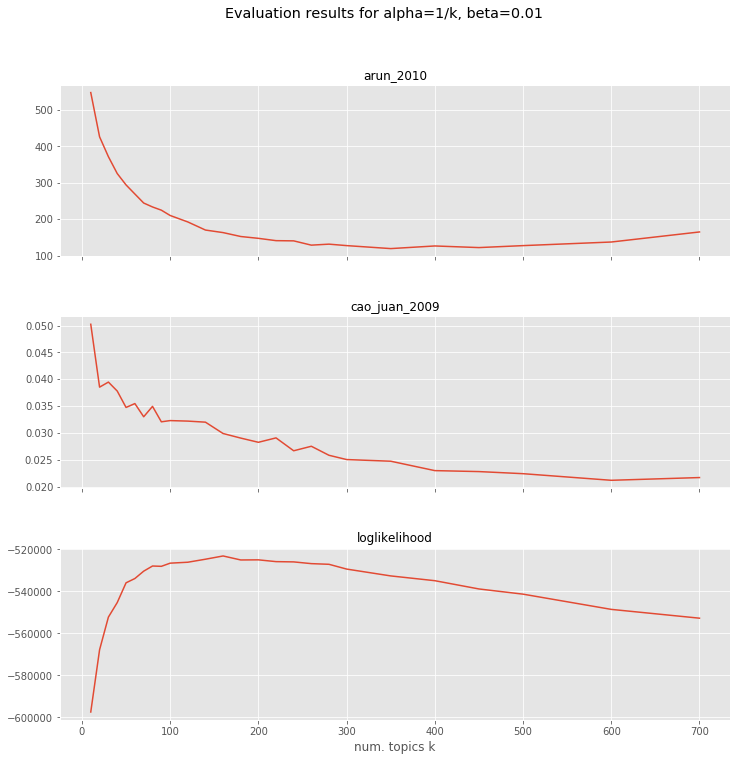

In [18]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [19]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 30
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 10
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 70
INFO:lda:n_topics: 40
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 80
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 60
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
IN

INFO:lda:<50> log likelihood: -590922
INFO:lda:<80> log likelihood: -603143
INFO:lda:<90> log likelihood: -603009
INFO:lda:<30> log likelihood: -604939
INFO:lda:<20> log likelihood: -644437
INFO:lda:<50> log likelihood: -593549
INFO:lda:<20> log likelihood: -653480
INFO:lda:<10> log likelihood: -753387
INFO:lda:<60> log likelihood: -589200
INFO:lda:<100> log likelihood: -602282
INFO:lda:<10> log likelihood: -743472
INFO:lda:<60> log likelihood: -591810
INFO:lda:<30> log likelihood: -609766
INFO:lda:<110> log likelihood: -602550
INFO:lda:<40> log likelihood: -596319
INFO:lda:<30> log likelihood: -622410
INFO:lda:<70> log likelihood: -588138
INFO:lda:<70> log likelihood: -591259
INFO:lda:<120> log likelihood: -602041
INFO:lda:<10> log likelihood: -770508
INFO:lda:<20> log likelihood: -659773
INFO:lda:<30> log likelihood: -618937
INFO:lda:<130> log likelihood: -602426
INFO:lda:<20> log likelihood: -666990
INFO:lda:<50> log likelihood: -591502
INFO:lda:<30> log likelihood: -632270
INFO:lda

INFO:lda:<150> log likelihood: -580631
INFO:lda:<350> log likelihood: -587366
INFO:lda:<90> log likelihood: -601000
INFO:lda:<290> log likelihood: -582014
INFO:lda:<540> log likelihood: -600394
INFO:lda:<360> log likelihood: -587040
INFO:lda:<550> log likelihood: -600365
INFO:lda:<190> log likelihood: -582255
INFO:lda:<100> log likelihood: -597251
INFO:lda:<220> log likelihood: -579929
INFO:lda:<560> log likelihood: -599997
INFO:lda:<300> log likelihood: -582594
INFO:lda:<160> log likelihood: -580579
INFO:lda:<140> log likelihood: -584975
INFO:lda:<370> log likelihood: -587393
INFO:lda:<60> log likelihood: -635180
INFO:lda:<570> log likelihood: -600300
INFO:lda:<130> log likelihood: -589802
INFO:lda:<380> log likelihood: -587466
INFO:lda:<40> log likelihood: -673143
INFO:lda:<580> log likelihood: -599969
INFO:lda:<200> log likelihood: -582143
INFO:lda:<80> log likelihood: -612220
INFO:lda:<310> log likelihood: -582219
INFO:lda:<390> log likelihood: -587125
INFO:lda:<590> log likelihood

INFO:lda:<220> log likelihood: -586724
INFO:lda:<990> log likelihood: -600006
INFO:lda:<390> log likelihood: -578979
INFO:lda:<670> log likelihood: -586006
INFO:lda:<1000> log likelihood: -599551
INFO:lda:<120> log likelihood: -611248
INFO:lda:<1010> log likelihood: -599676
INFO:lda:<680> log likelihood: -585995
INFO:lda:<350> log likelihood: -580042
INFO:lda:<290> log likelihood: -579315
INFO:lda:<170> log likelihood: -592969
INFO:lda:<1020> log likelihood: -599910
INFO:lda:<530> log likelihood: -581574
INFO:lda:<400> log likelihood: -579167
INFO:lda:<690> log likelihood: -586430
INFO:lda:<80> log likelihood: -638901
INFO:lda:<1030> log likelihood: -599932
INFO:lda:<250> log likelihood: -582236
INFO:lda:<230> log likelihood: -586543
INFO:lda:<540> log likelihood: -581223
INFO:lda:<1040> log likelihood: -599883
INFO:lda:<360> log likelihood: -579750
INFO:lda:<700> log likelihood: -585924
INFO:lda:<410> log likelihood: -579243
INFO:lda:<300> log likelihood: -579895
INFO:lda:<1050> log l

INFO:lda:<1450> log likelihood: -599563
INFO:lda:<500> log likelihood: -579956
INFO:lda:<100> log likelihood: -633888
INFO:lda:<980> log likelihood: -585903
INFO:lda:<580> log likelihood: -578977
INFO:lda:<1460> log likelihood: -599493
INFO:lda:<750> log likelihood: -581114
INFO:lda:<250> log likelihood: -589564
INFO:lda:<1470> log likelihood: -599969
INFO:lda:<420> log likelihood: -578616
INFO:lda:<990> log likelihood: -586012
INFO:lda:<150> log likelihood: -610004
INFO:lda:<360> log likelihood: -581339
INFO:lda:<760> log likelihood: -580660
INFO:lda:<1480> log likelihood: -599913
INFO:lda:<320> log likelihood: -585023
INFO:lda:<590> log likelihood: -579150
INFO:lda:<510> log likelihood: -580109
INFO:lda:<1000> log likelihood: -585699
INFO:lda:<200> log likelihood: -595842
INFO:lda:<1490> log likelihood: -599832
INFO:lda:<770> log likelihood: -581080
INFO:lda:<1010> log likelihood: -585828
INFO:lda:<1500> log likelihood: -599883
INFO:lda:<270> log likelihood: -585069
INFO:lda:<370> lo

INFO:lda:<1890> log likelihood: -599798
INFO:lda:<760> log likelihood: -578746
INFO:lda:<640> log likelihood: -578846
INFO:lda:<260> log likelihood: -593988
INFO:lda:<1290> log likelihood: -586307
INFO:lda:<1900> log likelihood: -600053
INFO:lda:<330> log likelihood: -588490
INFO:lda:<990> log likelihood: -581225
INFO:lda:<1910> log likelihood: -599594
INFO:lda:<150> log likelihood: -619062
INFO:lda:<1300> log likelihood: -585955
INFO:lda:<770> log likelihood: -578792
INFO:lda:<1920> log likelihood: -599657
INFO:lda:<1000> log likelihood: -581322
INFO:lda:<550> log likelihood: -577461
INFO:lda:<650> log likelihood: -578685
INFO:lda:<420> log likelihood: -584158
INFO:lda:<350> log likelihood: -584568
INFO:lda:<1930> log likelihood: -600192
INFO:lda:<480> log likelihood: -579890
INFO:lda:<1310> log likelihood: -585822
INFO:lda:<200> log likelihood: -604449
INFO:lda:<780> log likelihood: -578737
INFO:lda:<1010> log likelihood: -581203
INFO:lda:<1940> log likelihood: -599955
INFO:lda:<1320

INFO:lda:<970> log likelihood: -578433
INFO:lda:<1240> log likelihood: -580635
INFO:lda:<250> log likelihood: -601268
INFO:lda:<810> log likelihood: -577902
INFO:lda:<520> log likelihood: -582816
INFO:lda:<1640> log likelihood: -585539
INFO:lda:<210> log likelihood: -611353
INFO:lda:<330> log likelihood: -592227
INFO:lda:<600> log likelihood: -579681
INFO:lda:<980> log likelihood: -578311
INFO:lda:<1250> log likelihood: -580501
INFO:lda:<680> log likelihood: -577752
INFO:lda:<1650> log likelihood: -585966
INFO:lda:<190> log likelihood: -614868
INFO:lda:<1660> log likelihood: -585333
INFO:lda:<420> log likelihood: -586879
INFO:lda:<170> log likelihood: -620173
INFO:lda:<1260> log likelihood: -581071
INFO:lda:<820> log likelihood: -578100
INFO:lda:<450> log likelihood: -583362
INFO:lda:<990> log likelihood: -578584
INFO:lda:<1670> log likelihood: -585169
INFO:lda:<610> log likelihood: -579580
INFO:lda:<690> log likelihood: -577507
INFO:lda:<530> log likelihood: -583106
INFO:lda:<1270> lo

INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.0038461538461538464, 'eta': 0.1, 'n_iter': 2000, 'n_topics': 260}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 260
INFO:lda:n_iter: 2000
INFO:lda:<830> log likelihood: -577297
INFO:lda:<550> log likelihood: -582954
INFO:lda:<1510> log likelihood: -580090
INFO:lda:<1200> log likelihood: -578400
INFO:lda:<350> log likelihood: -596680
INFO:lda:<260> log likelihood: -607673
INFO:lda:<990> log likelihood: -577643
INFO:lda:<640> log likelihood: -582669
INFO:lda:<1520> log likelihood: -580192
INFO:lda:<740> log likelihood: -579580
INFO:lda:<210> log likelihood: -616522
INFO:lda:<510> log likelihood: -586149
INFO:lda:<1000> log likelihood: -577474
INFO:lda:<410> log likelihood: -591088
INFO:lda:<1210> log likelihood: -578544
INFO:lda:<310> log likelihood: -597984
INFO:lda:<1530> log likelihood: -579902
INFO:lda:<840> log like

INFO:lda:<1830> log likelihood: -579805
INFO:lda:<890> log likelihood: -579240
INFO:lda:<1010> log likelihood: -577322
INFO:lda:<680> log likelihood: -582896
INFO:lda:<780> log likelihood: -582509
INFO:lda:<1470> log likelihood: -578399
INFO:lda:<620> log likelihood: -586051
INFO:lda:<1840> log likelihood: -580299
INFO:lda:<1220> log likelihood: -577746
INFO:lda:<1020> log likelihood: -576794
INFO:lda:<1850> log likelihood: -580194
INFO:lda:<900> log likelihood: -579825
INFO:lda:<320> log likelihood: -603560
INFO:lda:<1480> log likelihood: -578402
INFO:lda:<430> log likelihood: -595326
INFO:lda:<100> log likelihood: -640325
INFO:lda:<500> log likelihood: -590389
INFO:lda:<1230> log likelihood: -577749
INFO:lda:<690> log likelihood: -582479
INFO:lda:<1030> log likelihood: -576887
INFO:lda:<1860> log likelihood: -580157
INFO:lda:<790> log likelihood: -582152
INFO:lda:<380> log likelihood: -597652
INFO:lda:<1490> log likelihood: -578572
INFO:lda:<630> log likelihood: -586573
INFO:lda:<187

INFO:lda:<140> log likelihood: -631967
INFO:lda:<1060> log likelihood: -578749
INFO:lda:<1210> log likelihood: -576727
INFO:lda:<70> log likelihood: -659348
INFO:lda:<590> log likelihood: -589743
INFO:lda:<1750> log likelihood: -577793
INFO:lda:<1450> log likelihood: -577792
INFO:lda:<300> log likelihood: -612220
INFO:lda:<740> log likelihood: -585761
INFO:lda:<380> log likelihood: -602123
INFO:lda:<510> log likelihood: -594936
INFO:lda:<1220> log likelihood: -576814
INFO:lda:<1070> log likelihood: -578790
INFO:lda:<1760> log likelihood: -578101
INFO:lda:<930> log likelihood: -581843
INFO:lda:<1460> log likelihood: -577201
INFO:lda:<820> log likelihood: -582431
INFO:lda:<1770> log likelihood: -577776
INFO:lda:<1230> log likelihood: -576957
INFO:lda:<1080> log likelihood: -579143
INFO:lda:<1470> log likelihood: -577907
INFO:lda:<750> log likelihood: -586283
INFO:lda:<600> log likelihood: -590083
INFO:lda:<1780> log likelihood: -577763
INFO:lda:<450> log likelihood: -597216
INFO:lda:<340

INFO:lda:<1240> log likelihood: -578861
INFO:lda:<1710> log likelihood: -577047
INFO:lda:<390> log likelihood: -604572
INFO:lda:<520> log likelihood: -596362
INFO:lda:<0> log likelihood: -1465843
INFO:lda:<600> log likelihood: -594355
INFO:lda:<1430> log likelihood: -576645
INFO:lda:<1720> log likelihood: -577925
INFO:lda:<1090> log likelihood: -582236
INFO:lda:<190> log likelihood: -625669
INFO:lda:<1250> log likelihood: -578853
INFO:lda:<960> log likelihood: -582152
INFO:lda:<880> log likelihood: -585493
INFO:lda:<1730> log likelihood: -577237
INFO:lda:<450> log likelihood: -600855
INFO:lda:<700> log likelihood: -590036
INFO:lda:<1440> log likelihood: -576609
INFO:lda:<1100> log likelihood: -582347
INFO:lda:<1260> log likelihood: -579309
INFO:lda:<1740> log likelihood: -578084
INFO:lda:<1450> log likelihood: -576880
INFO:lda:<970> log likelihood: -581913
INFO:lda:<1750> log likelihood: -577431
INFO:lda:<530> log likelihood: -596595
INFO:lda:<890> log likelihood: -585782
INFO:lda:<120

INFO:lda:<1270> log likelihood: -581629
INFO:lda:<1460> log likelihood: -578227
INFO:lda:<610> log likelihood: -596247
INFO:lda:<1660> log likelihood: -576165
INFO:lda:<410> log likelihood: -609779
INFO:lda:<700> log likelihood: -594117
INFO:lda:<520> log likelihood: -599969
INFO:lda:<1120> log likelihood: -582198
INFO:lda:<100> log likelihood: -649157
INFO:lda:<1670> log likelihood: -576770
INFO:lda:<820> log likelihood: -589640
INFO:lda:<1280> log likelihood: -581354
INFO:lda:<1470> log likelihood: -578940
INFO:lda:<1030> log likelihood: -585567
INFO:lda:<1130> log likelihood: -582516
INFO:lda:<1680> log likelihood: -576598
INFO:lda:<460> log likelihood: -603200
INFO:lda:<1290> log likelihood: -581938
INFO:lda:<1480> log likelihood: -579147
INFO:lda:<170> log likelihood: -631583
INFO:lda:<0> log likelihood: -1487408
INFO:lda:<1040> log likelihood: -585831
INFO:lda:<1690> log likelihood: -576433
INFO:lda:<250> log likelihood: -620931
INFO:lda:<710> log likelihood: -593745
INFO:lda:<11

INFO:lda:<310> log likelihood: -617281
INFO:lda:<960> log likelihood: -589314
INFO:lda:<610> log likelihood: -599832
INFO:lda:<1500> log likelihood: -581394
INFO:lda:<1970> log likelihood: -576218
INFO:lda:<820> log likelihood: -593522
INFO:lda:<1320> log likelihood: -581903
INFO:lda:<1720> log likelihood: -578718
INFO:lda:<540> log likelihood: -602296
INFO:lda:<720> log likelihood: -595751
INFO:lda:<1210> log likelihood: -585510
INFO:lda:<1980> log likelihood: -576543
INFO:lda:<1510> log likelihood: -581866
INFO:lda:<230> log likelihood: -623751
INFO:lda:<1730> log likelihood: -578604
INFO:lda:<1330> log likelihood: -582196
INFO:lda:<970> log likelihood: -588888
INFO:lda:<1990> log likelihood: -576035
INFO:lda:<1520> log likelihood: -581562
INFO:lda:<830> log likelihood: -593042
INFO:lda:<100> log likelihood: -655129
INFO:lda:<1740> log likelihood: -578547
INFO:lda:<1220> log likelihood: -585808
INFO:lda:<1999> log likelihood: -576176
INFO:tmtoolkit:> evaluation result with metric "lo

INFO:lda:<30> log likelihood: -733505
INFO:lda:<1390> log likelihood: -585331
INFO:lda:<560> log likelihood: -606280
INFO:lda:<1530> log likelihood: -581272
INFO:lda:<830> log likelihood: -595309
INFO:lda:<620> log likelihood: -601845
INFO:lda:<950> log likelihood: -593255
INFO:lda:<1740> log likelihood: -581515
INFO:lda:<1999> log likelihood: -578120
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -578286.312317
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.039097
INFO:lda:<1120> log likelihood: -589287
INFO:lda:<710> log likelihood: -599369
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 303.057709
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.0022222222222222222, 'eta': 0.1, 'n_iter': 2000, 'n_topics': 450}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 450
INFO:lda:n_iter: 2000
INFO:lda:<1540> log likelihood: -581

INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.002, 'eta': 0.1, 'n_iter': 2000, 'n_topics': 500}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 500
INFO:lda:n_iter: 2000
INFO:lda:<1600> log likelihood: -585014
INFO:lda:<280> log likelihood: -623449
INFO:lda:<1770> log likelihood: -581301
INFO:lda:<1290> log likelihood: -589317
INFO:lda:<1610> log likelihood: -585322
INFO:lda:<720> log likelihood: -601846
INFO:lda:<960> log likelihood: -595730
INFO:lda:<1100> log likelihood: -592438
INFO:lda:<1780> log likelihood: -581352
INFO:lda:<650> log likelihood: -606414
INFO:lda:<820> log likelihood: -598807
INFO:lda:<1300> log likelihood: -588486
INFO:lda:<1620> log likelihood: -585284
INFO:lda:<220> log likelihood: -631554
INFO:lda:<1790> log likelihood: -581285
INFO:lda:<0> log likelihood: -1534384
INFO:lda:<40> log likelihood: -722589
INFO:lda:<370> log likelihood: -615534

INFO:lda:<1850> log likelihood: -584806
INFO:lda:<1100> log likelihood: -595620
INFO:lda:<940> log likelihood: -598902
INFO:lda:<1490> log likelihood: -588605
INFO:lda:<360> log likelihood: -619442
INFO:lda:<290> log likelihood: -625665
INFO:lda:<40> log likelihood: -730922
INFO:lda:<1860> log likelihood: -585286
INFO:lda:<1270> log likelihood: -593005
INFO:lda:<130> log likelihood: -661691
INFO:lda:<750> log likelihood: -605960
INFO:lda:<560> log likelihood: -609822
INFO:lda:<1500> log likelihood: -589033
INFO:lda:<1870> log likelihood: -584884
INFO:lda:<840> log likelihood: -600666
INFO:lda:<1110> log likelihood: -595278
INFO:lda:<950> log likelihood: -599071
INFO:lda:<450> log likelihood: -613792
INFO:lda:<210> log likelihood: -640317
INFO:lda:<1280> log likelihood: -592270
INFO:lda:<1510> log likelihood: -589024
INFO:lda:<1880> log likelihood: -584773
INFO:lda:<760> log likelihood: -605447
INFO:lda:<1890> log likelihood: -585616
INFO:lda:<850> log likelihood: -600658
INFO:lda:<370>

INFO:lda:<1750> log likelihood: -588410
INFO:lda:<1470> log likelihood: -593092
INFO:lda:<280> log likelihood: -634323
INFO:lda:<670> log likelihood: -608152
INFO:lda:<90> log likelihood: -689121
INFO:lda:<550> log likelihood: -611199
INFO:lda:<1100> log likelihood: -598980
INFO:lda:<1290> log likelihood: -595393
INFO:lda:<1760> log likelihood: -588856
INFO:lda:<1480> log likelihood: -592558
INFO:lda:<980> log likelihood: -600199
INFO:lda:<380> log likelihood: -622394
INFO:lda:<880> log likelihood: -603901
INFO:lda:<460> log likelihood: -616448
INFO:lda:<1110> log likelihood: -598807
INFO:lda:<1770> log likelihood: -589200
INFO:lda:<1300> log likelihood: -594604
INFO:lda:<1490> log likelihood: -592471
INFO:lda:<680> log likelihood: -607678
INFO:lda:<560> log likelihood: -611320
INFO:lda:<290> log likelihood: -634125
INFO:lda:<1780> log likelihood: -588865
INFO:lda:<990> log likelihood: -601139
INFO:lda:<200> log likelihood: -648764
INFO:lda:<1500> log likelihood: -592416
INFO:lda:<1120

INFO:lda:<800> log likelihood: -607230
INFO:lda:<1130> log likelihood: -599999
INFO:lda:<1280> log likelihood: -598081
INFO:lda:<1720> log likelihood: -592351
INFO:lda:<1500> log likelihood: -594414
INFO:lda:<90> log likelihood: -701408
INFO:lda:<150> log likelihood: -669886
INFO:lda:<670> log likelihood: -610505
INFO:lda:<1020> log likelihood: -603812
INFO:lda:<270> log likelihood: -642865
INFO:lda:<1730> log likelihood: -592380
INFO:lda:<370> log likelihood: -629632
INFO:lda:<1290> log likelihood: -598568
INFO:lda:<210> log likelihood: -651462
INFO:lda:<1140> log likelihood: -599962
INFO:lda:<810> log likelihood: -607074
INFO:lda:<1510> log likelihood: -595377
INFO:lda:<570> log likelihood: -614393
INFO:lda:<1740> log likelihood: -592470
INFO:lda:<490> log likelihood: -617785
INFO:lda:<60> log likelihood: -732210
INFO:lda:<1030> log likelihood: -603670
INFO:lda:<1520> log likelihood: -595295
INFO:lda:<680> log likelihood: -610077
INFO:lda:<1300> log likelihood: -598348
INFO:lda:<1150

INFO:lda:<1999> log likelihood: -592299
INFO:lda:<1740> log likelihood: -594595
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -592736.292262
INFO:lda:<1490> log likelihood: -598056
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.048739
INFO:lda:<690> log likelihood: -612279
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 308.366232
INFO:lda:<810> log likelihood: -609331
INFO:lda:<1750> log likelihood: -594793
INFO:lda:<1320> log likelihood: -599655
INFO:lda:<1500> log likelihood: -598196
INFO:lda:<470> log likelihood: -626290
INFO:lda:<1190> log likelihood: -602421
INFO:lda:<960> log likelihood: -606842
INFO:lda:<220> log likelihood: -657247
INFO:lda:<610> log likelihood: -615364
INFO:lda:<1760> log likelihood: -595007
INFO:lda:<700> log likelihood: -612643
INFO:lda:<360> log likelihood: -636342
INFO:lda:<1330> log likelihood: -599923
INFO:lda:<820> log likelihood: -609452
INFO:lda:<1510> log likelihood: -598096
INFO:lda:<290> log likelih

INFO:lda:<1120> log likelihood: -606307
INFO:lda:<1520> log likelihood: -599399
INFO:lda:<450> log likelihood: -632911
INFO:lda:<580> log likelihood: -622886
INFO:lda:<1370> log likelihood: -603283
INFO:lda:<370> log likelihood: -638952
INFO:lda:<1730> log likelihood: -598045
INFO:lda:<840> log likelihood: -611882
INFO:lda:<970> log likelihood: -607845
INFO:lda:<160> log likelihood: -689835
INFO:lda:<1530> log likelihood: -599603
INFO:lda:<1130> log likelihood: -605360
INFO:lda:<740> log likelihood: -614266
INFO:lda:<210> log likelihood: -667876
INFO:lda:<1380> log likelihood: -603390
INFO:lda:<1740> log likelihood: -598165
INFO:lda:<980> log likelihood: -608141
INFO:lda:<1540> log likelihood: -599465
INFO:lda:<460> log likelihood: -632389
INFO:lda:<850> log likelihood: -611612
INFO:lda:<590> log likelihood: -623653
INFO:lda:<300> log likelihood: -649580
INFO:lda:<1140> log likelihood: -605456
INFO:lda:<1750> log likelihood: -598095
INFO:lda:<1390> log likelihood: -603318
INFO:lda:<750

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.067119
INFO:lda:<1320> log likelihood: -606129
INFO:lda:<1590> log likelihood: -603127
INFO:lda:<1150> log likelihood: -608993
INFO:lda:<470> log likelihood: -635217
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 322.152808
INFO:lda:<1010> log likelihood: -611354
INFO:lda:<1780> log likelihood: -598562
INFO:lda:<1330> log likelihood: -605369
INFO:lda:<1600> log likelihood: -602804
INFO:lda:<570> log likelihood: -627890
INFO:lda:<900> log likelihood: -613745
INFO:lda:<720> log likelihood: -621535
INFO:lda:<1160> log likelihood: -608958
INFO:lda:<1790> log likelihood: -599858
INFO:lda:<1020> log likelihood: -611411
INFO:lda:<390> log likelihood: -645301
INFO:lda:<1610> log likelihood: -603246
INFO:lda:<1340> log likelihood: -604959
INFO:lda:<480> log likelihood: -634774
INFO:lda:<1170> log likelihood: -609244
INFO:lda:<1800> log likelihood: -599387
INFO:lda:<910> log likelihood: -612982
INFO:lda:<290> log like

INFO:lda:<1850> log likelihood: -602717
INFO:lda:<870> log likelihood: -619831
INFO:lda:<700> log likelihood: -624288
INFO:lda:<590> log likelihood: -632780
INFO:lda:<490> log likelihood: -640666
INFO:lda:<1370> log likelihood: -607326
INFO:lda:<1080> log likelihood: -612416
INFO:lda:<1560> log likelihood: -605105
INFO:lda:<1860> log likelihood: -602981
INFO:lda:<1210> log likelihood: -609372
INFO:lda:<370> log likelihood: -650598
INFO:lda:<300> log likelihood: -667999
INFO:lda:<1570> log likelihood: -604915
INFO:lda:<1380> log likelihood: -607520
INFO:lda:<880> log likelihood: -619233
INFO:lda:<1090> log likelihood: -612350
INFO:lda:<1870> log likelihood: -602657
INFO:lda:<710> log likelihood: -624309
INFO:lda:<1220> log likelihood: -610514
INFO:lda:<600> log likelihood: -632115
INFO:lda:<1580> log likelihood: -604932
INFO:lda:<1390> log likelihood: -608491
INFO:lda:<500> log likelihood: -641236
INFO:lda:<1880> log likelihood: -602929
INFO:lda:<1100> log likelihood: -612812
INFO:lda:<

INFO:lda:<1060> log likelihood: -617611
INFO:lda:<1300> log likelihood: -611310
INFO:lda:<620> log likelihood: -637559
INFO:lda:<1850> log likelihood: -604593
INFO:lda:<1450> log likelihood: -610301
INFO:lda:<1640> log likelihood: -607730
INFO:lda:<390> log likelihood: -661190
INFO:lda:<1310> log likelihood: -611262
INFO:lda:<740> log likelihood: -629414
INFO:lda:<870> log likelihood: -622703
INFO:lda:<1070> log likelihood: -617440
INFO:lda:<1860> log likelihood: -604243
INFO:lda:<1650> log likelihood: -607633
INFO:lda:<1460> log likelihood: -609785
INFO:lda:<480> log likelihood: -643837
INFO:lda:<1320> log likelihood: -611598
INFO:lda:<1870> log likelihood: -604546
INFO:lda:<630> log likelihood: -636396
INFO:lda:<1080> log likelihood: -618118
INFO:lda:<1660> log likelihood: -607002
INFO:lda:<880> log likelihood: -622866
INFO:lda:<750> log likelihood: -628344
INFO:lda:<1470> log likelihood: -609909
INFO:lda:<1880> log likelihood: -604099
INFO:lda:<1330> log likelihood: -610930
INFO:lda

INFO:lda:<1290> log likelihood: -616801
INFO:lda:<1730> log likelihood: -609581
INFO:lda:<1950> log likelihood: -607265
INFO:lda:<600> log likelihood: -640284
INFO:lda:<1060> log likelihood: -621810
INFO:lda:<910> log likelihood: -626414
INFO:lda:<1580> log likelihood: -611368
INFO:lda:<1960> log likelihood: -607111
INFO:lda:<1740> log likelihood: -609662
INFO:lda:<500> log likelihood: -654624
INFO:lda:<1300> log likelihood: -616714
INFO:lda:<780> log likelihood: -632721
INFO:lda:<1070> log likelihood: -620577
INFO:lda:<1970> log likelihood: -607317
INFO:lda:<920> log likelihood: -626534
INFO:lda:<1590> log likelihood: -610918
INFO:lda:<1750> log likelihood: -608740
INFO:lda:<610> log likelihood: -639970
INFO:lda:<1310> log likelihood: -616264
INFO:lda:<1980> log likelihood: -607176
INFO:lda:<1600> log likelihood: -611920
INFO:lda:<1760> log likelihood: -608505
INFO:lda:<1080> log likelihood: -621150
INFO:lda:<790> log likelihood: -632261
INFO:lda:<930> log likelihood: -626930
INFO:lda

INFO:lda:<1580> log likelihood: -616782
INFO:lda:<1310> log likelihood: -620741
INFO:lda:<1920> log likelihood: -611366
INFO:lda:<640> log likelihood: -650877
INFO:lda:<980> log likelihood: -628953
INFO:lda:<1590> log likelihood: -615864
INFO:lda:<1140> log likelihood: -624728
INFO:lda:<1320> log likelihood: -620993
INFO:lda:<1930> log likelihood: -611214
INFO:lda:<770> log likelihood: -636567
INFO:lda:<1600> log likelihood: -616492
INFO:lda:<1940> log likelihood: -611009
INFO:lda:<1330> log likelihood: -619959
INFO:lda:<990> log likelihood: -628349
INFO:lda:<1150> log likelihood: -624081
INFO:lda:<1610> log likelihood: -616031
INFO:lda:<1950> log likelihood: -610693
INFO:lda:<650> log likelihood: -650065
INFO:lda:<780> log likelihood: -636526
INFO:lda:<1340> log likelihood: -620074
INFO:lda:<1960> log likelihood: -610475
INFO:lda:<1000> log likelihood: -629292
INFO:lda:<1160> log likelihood: -624477
INFO:lda:<1620> log likelihood: -615936
INFO:lda:<1970> log likelihood: -611162
INFO:l

INFO:lda:<1460> log likelihood: -622234
INFO:lda:<1270> log likelihood: -626587
INFO:lda:<1680> log likelihood: -619627
INFO:lda:<1010> log likelihood: -633383
INFO:lda:<850> log likelihood: -644164
INFO:lda:<1470> log likelihood: -623160
INFO:lda:<1690> log likelihood: -619485
INFO:lda:<1280> log likelihood: -626409
INFO:lda:<1020> log likelihood: -633077
INFO:lda:<1480> log likelihood: -622703
INFO:lda:<1700> log likelihood: -619819
INFO:lda:<860> log likelihood: -643924
INFO:lda:<1290> log likelihood: -626749
INFO:lda:<1490> log likelihood: -622225
INFO:lda:<1710> log likelihood: -619288
INFO:lda:<1030> log likelihood: -633374
INFO:lda:<1300> log likelihood: -626834
INFO:lda:<1720> log likelihood: -619690
INFO:lda:<1500> log likelihood: -622484
INFO:lda:<870> log likelihood: -644468
INFO:lda:<1040> log likelihood: -634150
INFO:lda:<1310> log likelihood: -626718
INFO:lda:<1730> log likelihood: -620355
INFO:lda:<1510> log likelihood: -621948
INFO:lda:<880> log likelihood: -643280
INFO

INFO:lda:<1730> log likelihood: -625885
INFO:lda:<1160> log likelihood: -639034
INFO:lda:<1390> log likelihood: -631653
INFO:lda:<1980> log likelihood: -621691
INFO:lda:<1740> log likelihood: -625955
INFO:lda:<1170> log likelihood: -638824
INFO:lda:<1990> log likelihood: -622352
INFO:lda:<1400> log likelihood: -631635
INFO:lda:<1750> log likelihood: -626200
INFO:lda:<1999> log likelihood: -620704
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -622352.268370
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.292791
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 410.623841
INFO:lda:<1180> log likelihood: -638586
INFO:lda:<1760> log likelihood: -625045
INFO:lda:<1410> log likelihood: -631881
INFO:lda:<1770> log likelihood: -625850
INFO:lda:<1190> log likelihood: -637904
INFO:lda:<1420> log likelihood: -630358
INFO:lda:<1780> log likelihood: -626435
INFO:lda:<1430> log likelihood: -631314
INFO:lda:<1200> log likelihood: -637477
INFO:lda:<1790> l

plotting evaluation results


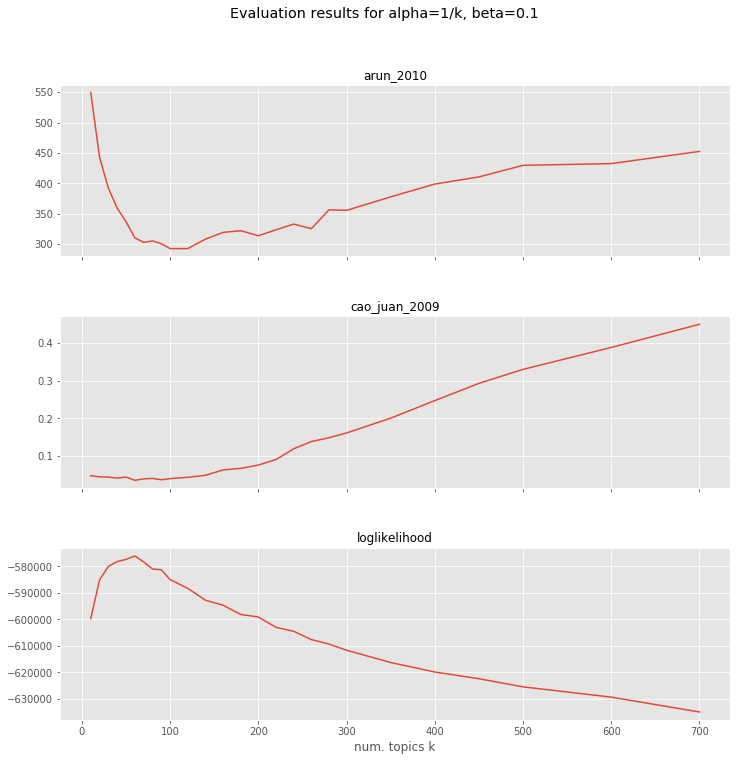

In [20]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [21]:
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
    

cao : 0.03542604722444485 	 60
arun: 292.8052968428844 	 100


### alpha: 0.1 beta: 1/(10*k)

In [22]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 70
INFO:lda:n_words: 98337
INFO:lda:n_topics: 20
INFO:lda:n_topics: 40
INFO:lda:n_topics: 80
INFO:lda:n_documents: 18049
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:n_topics: 90
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:n_iter: 2000
INFO:lda:n

INFO:lda:<10> log likelihood: -676971
INFO:lda:<50> log likelihood: -598281
INFO:lda:<80> log likelihood: -604212
INFO:lda:<20> log likelihood: -627257
INFO:lda:<50> log likelihood: -600059
INFO:lda:<10> log likelihood: -699586
INFO:lda:<20> log likelihood: -635304
INFO:lda:<60> log likelihood: -596222
INFO:lda:<30> log likelihood: -611921
INFO:lda:<90> log likelihood: -603459
INFO:lda:<40> log likelihood: -605128
INFO:lda:<100> log likelihood: -603193
INFO:lda:<70> log likelihood: -594744
INFO:lda:<60> log likelihood: -597930
INFO:lda:<110> log likelihood: -602787
INFO:lda:<30> log likelihood: -616953
INFO:lda:<10> log likelihood: -724970
INFO:lda:<10> log likelihood: -730932
INFO:lda:<40> log likelihood: -607875
INFO:lda:<80> log likelihood: -594197
INFO:lda:<30> log likelihood: -623508
INFO:lda:<20> log likelihood: -644345
INFO:lda:<120> log likelihood: -602652
INFO:lda:<10> log likelihood: -712072
INFO:lda:<20> log likelihood: -653944
INFO:lda:<70> log likelihood: -596652
INFO:lda:

INFO:lda:<360> log likelihood: -588621
INFO:lda:<530> log likelihood: -599541
INFO:lda:<90> log likelihood: -623674
INFO:lda:<100> log likelihood: -617549
INFO:lda:<540> log likelihood: -599782
INFO:lda:<40> log likelihood: -693167
INFO:lda:<370> log likelihood: -587871
INFO:lda:<230> log likelihood: -587480
INFO:lda:<160> log likelihood: -596891
INFO:lda:<50> log likelihood: -671556
INFO:lda:<280> log likelihood: -588156
INFO:lda:<190> log likelihood: -591967
INFO:lda:<140> log likelihood: -601878
INFO:lda:<550> log likelihood: -600138
INFO:lda:<380> log likelihood: -588282
INFO:lda:<120> log likelihood: -607425
INFO:lda:<560> log likelihood: -599578
INFO:lda:<70> log likelihood: -649684
INFO:lda:<290> log likelihood: -588155
INFO:lda:<240> log likelihood: -587482
INFO:lda:<390> log likelihood: -588068
INFO:lda:<570> log likelihood: -599741
INFO:lda:<200> log likelihood: -591980
INFO:lda:<170> log likelihood: -596921
INFO:lda:<80> log likelihood: -641880
INFO:lda:<300> log likelihood:

INFO:lda:<250> log likelihood: -599109
INFO:lda:<510> log likelihood: -587152
INFO:lda:<340> log likelihood: -589688
INFO:lda:<90> log likelihood: -663053
INFO:lda:<140> log likelihood: -633912
INFO:lda:<680> log likelihood: -586884
INFO:lda:<980> log likelihood: -598099
INFO:lda:<410> log likelihood: -586050
INFO:lda:<80> log likelihood: -671644
INFO:lda:<990> log likelihood: -598398
INFO:lda:<690> log likelihood: -587446
INFO:lda:<290> log likelihood: -593883
INFO:lda:<520> log likelihood: -587594
INFO:lda:<170> log likelihood: -616573
INFO:lda:<700> log likelihood: -586599
INFO:lda:<1000> log likelihood: -598159
INFO:lda:<420> log likelihood: -586504
INFO:lda:<350> log likelihood: -589425
INFO:lda:<100> log likelihood: -651538
INFO:lda:<530> log likelihood: -586768
INFO:lda:<1010> log likelihood: -598113
INFO:lda:<190> log likelihood: -609649
INFO:lda:<710> log likelihood: -586803
INFO:lda:<220> log likelihood: -602865
INFO:lda:<260> log likelihood: -599023
INFO:lda:<1020> log likel

INFO:lda:<990> log likelihood: -586514
INFO:lda:<360> log likelihood: -597641
INFO:lda:<1410> log likelihood: -598015
INFO:lda:<130> log likelihood: -658782
INFO:lda:<590> log likelihood: -584762
INFO:lda:<490> log likelihood: -588939
INFO:lda:<750> log likelihood: -586441
INFO:lda:<1000> log likelihood: -586381
INFO:lda:<1420> log likelihood: -597977
INFO:lda:<420> log likelihood: -592454
INFO:lda:<1430> log likelihood: -597784
INFO:lda:<1010> log likelihood: -586030
INFO:lda:<760> log likelihood: -585966
INFO:lda:<210> log likelihood: -628467
INFO:lda:<320> log likelihood: -601013
INFO:lda:<1440> log likelihood: -598065
INFO:lda:<280> log likelihood: -607175
INFO:lda:<600> log likelihood: -584923
INFO:lda:<1020> log likelihood: -586494
INFO:lda:<370> log likelihood: -597531
INFO:lda:<250> log likelihood: -613394
INFO:lda:<1450> log likelihood: -598064
INFO:lda:<500> log likelihood: -588839
INFO:lda:<770> log likelihood: -585952
INFO:lda:<1460> log likelihood: -597734
INFO:lda:<1030> 

INFO:lda:<1850> log likelihood: -597356
INFO:lda:<540> log likelihood: -590142
INFO:lda:<990> log likelihood: -585857
INFO:lda:<1280> log likelihood: -585777
INFO:lda:<1860> log likelihood: -597456
INFO:lda:<780> log likelihood: -584638
INFO:lda:<640> log likelihood: -588327
INFO:lda:<150> log likelihood: -664094
INFO:lda:<480> log likelihood: -596428
INFO:lda:<230> log likelihood: -635878
INFO:lda:<1290> log likelihood: -586028
INFO:lda:<1870> log likelihood: -597307
INFO:lda:<1000> log likelihood: -585455
INFO:lda:<370> log likelihood: -606105
INFO:lda:<190> log likelihood: -643221
INFO:lda:<1880> log likelihood: -597321
INFO:lda:<1300> log likelihood: -585940
INFO:lda:<420> log likelihood: -600009
INFO:lda:<330> log likelihood: -609775
INFO:lda:<790> log likelihood: -584604
INFO:lda:<550> log likelihood: -590356
INFO:lda:<1890> log likelihood: -597390
INFO:lda:<650> log likelihood: -587877
INFO:lda:<1010> log likelihood: -585595
INFO:lda:<1900> log likelihood: -597459
INFO:lda:<1310

INFO:lda:<680> log likelihood: -589782
INFO:lda:<970> log likelihood: -584754
INFO:lda:<520> log likelihood: -599283
INFO:lda:<460> log likelihood: -604744
INFO:lda:<600> log likelihood: -595531
INFO:lda:<1230> log likelihood: -585142
INFO:lda:<1620> log likelihood: -585971
INFO:lda:<810> log likelihood: -587830
INFO:lda:<290> log likelihood: -632733
INFO:lda:<1240> log likelihood: -585107
INFO:lda:<980> log likelihood: -584503
INFO:lda:<1630> log likelihood: -586011
INFO:lda:<410> log likelihood: -609099
INFO:lda:<190> log likelihood: -662064
INFO:lda:<690> log likelihood: -589877
INFO:lda:<1250> log likelihood: -585234
INFO:lda:<1640> log likelihood: -585969
INFO:lda:<240> log likelihood: -641034
INFO:lda:<820> log likelihood: -587507
INFO:lda:<610> log likelihood: -595239
INFO:lda:<530> log likelihood: -598836
INFO:lda:<1650> log likelihood: -585946
INFO:lda:<990> log likelihood: -584668
INFO:lda:<470> log likelihood: -605097
INFO:lda:<350> log likelihood: -623025
INFO:lda:<1260> lo

INFO:lda:<290> log likelihood: -639274
INFO:lda:<1520> log likelihood: -584751
INFO:lda:<1990> log likelihood: -585694
INFO:lda:<840> log likelihood: -589443
INFO:lda:<420> log likelihood: -621954
INFO:lda:<1200> log likelihood: -583894
INFO:lda:<1999> log likelihood: -585824
INFO:lda:<740> log likelihood: -594628
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -585694.385380
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.037462
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 426.542017
INFO:lda:<1530> log likelihood: -585000
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.0003846153846153846, 'n_iter': 2000, 'n_topics': 260}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 260
INFO:lda:<1010> log likelihood: -587245
INFO:lda:n_iter: 2000
INFO:lda:<640> log likelihood: -598628
INFO:lda:<50> log likelihood: -693

INFO:lda:<1030> log likelihood: -589316
INFO:lda:<690> log likelihood: -603444
INFO:lda:<610> log likelihood: -607535
INFO:lda:<770> log likelihood: -597187
INFO:lda:<430> log likelihood: -629807
INFO:lda:<1830> log likelihood: -584991
INFO:lda:<1230> log likelihood: -586943
INFO:lda:<900> log likelihood: -594214
INFO:lda:<1450> log likelihood: -583898
INFO:lda:<320> log likelihood: -649071
INFO:lda:<1840> log likelihood: -585161
INFO:lda:<1040> log likelihood: -588817
INFO:lda:<90> log likelihood: -686337
INFO:lda:<1240> log likelihood: -587780
INFO:lda:<30> log likelihood: -706078
INFO:lda:<1850> log likelihood: -584743
INFO:lda:<360> log likelihood: -638518
INFO:lda:<780> log likelihood: -597805
INFO:lda:<700> log likelihood: -603394
INFO:lda:<520> log likelihood: -620639
INFO:lda:<910> log likelihood: -593991
INFO:lda:<1860> log likelihood: -585019
INFO:lda:<1460> log likelihood: -583651
INFO:lda:<1250> log likelihood: -587538
INFO:lda:<260> log likelihood: -669147
INFO:lda:<1050> 

INFO:lda:<1710> log likelihood: -583963
INFO:lda:<610> log likelihood: -619878
INFO:lda:<820> log likelihood: -602530
INFO:lda:<1720> log likelihood: -583953
INFO:lda:<510> log likelihood: -629379
INFO:lda:<1230> log likelihood: -588569
INFO:lda:<1460> log likelihood: -586941
INFO:lda:<920> log likelihood: -597077
INFO:lda:<1070> log likelihood: -593608
INFO:lda:<1730> log likelihood: -583668
INFO:lda:<380> log likelihood: -648177
INFO:lda:<730> log likelihood: -606457
INFO:lda:<1470> log likelihood: -586906
INFO:lda:<1240> log likelihood: -588487
INFO:lda:<70> log likelihood: -693121
INFO:lda:<340> log likelihood: -656722
INFO:lda:<1740> log likelihood: -584103
INFO:lda:<930> log likelihood: -597617
INFO:lda:<1080> log likelihood: -593418
INFO:lda:<620> log likelihood: -619635
INFO:lda:<830> log likelihood: -602796
INFO:lda:<1480> log likelihood: -586987
INFO:lda:<430> log likelihood: -636976
INFO:lda:<1250> log likelihood: -588910
INFO:lda:<1750> log likelihood: -583908
INFO:lda:<310

INFO:lda:n_words: 98337
INFO:lda:n_topics: 300
INFO:lda:n_iter: 2000
INFO:lda:<1700> log likelihood: -586664
INFO:lda:<1440> log likelihood: -588914
INFO:lda:<180> log likelihood: -679446
INFO:lda:<1260> log likelihood: -593314
INFO:lda:<1710> log likelihood: -587027
INFO:lda:<1090> log likelihood: -597098
INFO:lda:<500> log likelihood: -636045
INFO:lda:<850> log likelihood: -606099
INFO:lda:<970> log likelihood: -601690
INFO:lda:<360> log likelihood: -665354
INFO:lda:<1450> log likelihood: -588375
INFO:lda:<400> log likelihood: -655730
INFO:lda:<720> log likelihood: -619416
INFO:lda:<600> log likelihood: -626750
INFO:lda:<1720> log likelihood: -586911
INFO:lda:<1270> log likelihood: -593140
INFO:lda:<1100> log likelihood: -597270
INFO:lda:<1460> log likelihood: -588526
INFO:lda:<980> log likelihood: -602202
INFO:lda:<860> log likelihood: -606125
INFO:lda:<1730> log likelihood: -586786
INFO:lda:<450> log likelihood: -647122
INFO:lda:<1280> log likelihood: -593036
INFO:lda:<1470> log li

INFO:tmtoolkit:> evaluation result with metric "arun_2010": 269.443258
INFO:lda:<420> log likelihood: -663338
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.00028571428571428574, 'n_iter': 2000, 'n_topics': 350}
INFO:lda:<840> log likelihood: -618431
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 350
INFO:lda:n_iter: 2000
INFO:lda:<590> log likelihood: -634815
INFO:lda:<1710> log likelihood: -588763
INFO:lda:<1480> log likelihood: -592622
INFO:lda:<1280> log likelihood: -596707
INFO:lda:<40> log likelihood: -718286
INFO:lda:<520> log likelihood: -647042
INFO:lda:<700> log likelihood: -625232
INFO:lda:<1010> log likelihood: -606016
INFO:lda:<100> log likelihood: -701370
INFO:lda:<1140> log likelihood: -601609
INFO:lda:<1490> log likelihood: -592831
INFO:lda:<1720> log likelihood: -588761
INFO:lda:<470> log likelihood: -654587
INFO:lda:<1290> log likelihoo

INFO:lda:<1490> log likelihood: -596133
INFO:lda:<490> log likelihood: -662563
INFO:lda:<1720> log likelihood: -592523
INFO:lda:<300> log likelihood: -673194
INFO:lda:<1999> log likelihood: -588176
INFO:lda:<980> log likelihood: -618143
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -588495.774316
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.021666
INFO:lda:<1330> log likelihood: -601495
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 243.322342
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.00025, 'n_iter': 2000, 'n_topics': 400}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 400
INFO:lda:n_iter: 2000
INFO:lda:<610> log likelihood: -645510
INFO:lda:<220> log likelihood: -681384
INFO:lda:<1500> log likelihood: -596295
INFO:lda:<1730> log likelihood: -592137
INFO:lda:<1180> log likelihood: -605392
INFO:lda

INFO:lda:<1540> log likelihood: -600645
INFO:lda:<570> log likelihood: -661076
INFO:lda:<1990> log likelihood: -592259
INFO:lda:<950> log likelihood: -622529
INFO:lda:<1740> log likelihood: -595814
INFO:lda:<1140> log likelihood: -618086
INFO:lda:<810> log likelihood: -631316
INFO:lda:<1370> log likelihood: -605192
INFO:lda:<1550> log likelihood: -601125
INFO:lda:<150> log likelihood: -700766
INFO:lda:<1999> log likelihood: -592628
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -592259.358984
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.020508
INFO:lda:<1750> log likelihood: -595717
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 218.153180
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.00022222222222222223, 'n_iter': 2000, 'n_topics': 450}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 450
INFO:lda:n_ite

INFO:lda:<1780> log likelihood: -600496
INFO:lda:<730> log likelihood: -651231
INFO:lda:<1580> log likelihood: -604787
INFO:lda:<660> log likelihood: -658925
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 196.187381
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.0002, 'n_iter': 2000, 'n_topics': 500}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 500
INFO:lda:<1320> log likelihood: -617231
INFO:lda:n_iter: 2000
INFO:lda:<210> log likelihood: -697203
INFO:lda:<820> log likelihood: -642757
INFO:lda:<1100> log likelihood: -623053
INFO:lda:<1790> log likelihood: -600417
INFO:lda:<940> log likelihood: -630888
INFO:lda:<140> log likelihood: -713351
INFO:lda:<1590> log likelihood: -604755
INFO:lda:<1330> log likelihood: -617961
INFO:lda:<1800> log likelihood: -600186
INFO:lda:<360> log likelihood: -677719
INFO:lda:<740> log likelihood: -651281
INFO

INFO:lda:<1510> log likelihood: -616655
INFO:lda:<280> log likelihood: -693156
INFO:lda:<360> log likelihood: -686663
INFO:lda:<1830> log likelihood: -604359
INFO:lda:<80> log likelihood: -746127
INFO:lda:<940> log likelihood: -641798
INFO:lda:<440> log likelihood: -676605
INFO:lda:<1270> log likelihood: -622947
INFO:lda:<1840> log likelihood: -605241
INFO:lda:<200> log likelihood: -709282
INFO:lda:<1520> log likelihood: -616911
INFO:lda:<40> log likelihood: -765019
INFO:lda:<850> log likelihood: -650112
INFO:lda:<1090> log likelihood: -630449
INFO:lda:<1850> log likelihood: -605087
INFO:lda:<770> log likelihood: -658470
INFO:lda:<550> log likelihood: -667959
INFO:lda:<950> log likelihood: -641609
INFO:lda:<1280> log likelihood: -622685
INFO:lda:<1530> log likelihood: -616550
INFO:lda:<140> log likelihood: -727400
INFO:lda:<1860> log likelihood: -605477
INFO:lda:<370> log likelihood: -686767
INFO:lda:<1100> log likelihood: -630541
INFO:lda:<450> log likelihood: -676271
INFO:lda:<290> l

INFO:lda:<1100> log likelihood: -642212
INFO:lda:<540> log likelihood: -674168
INFO:lda:<370> log likelihood: -689276
INFO:lda:<1260> log likelihood: -629943
INFO:lda:<1480> log likelihood: -621653
INFO:lda:<1770> log likelihood: -616336
INFO:lda:<660> log likelihood: -666194
INFO:lda:<90> log likelihood: -753391
INFO:lda:<200> log likelihood: -723701
INFO:lda:<990> log likelihood: -649532
INFO:lda:<140> log likelihood: -738375
INFO:lda:<890> log likelihood: -657726
INFO:lda:<1110> log likelihood: -641712
INFO:lda:<1490> log likelihood: -621346
INFO:lda:<1780> log likelihood: -616198
INFO:lda:<1270> log likelihood: -630350
INFO:lda:<460> log likelihood: -685119
INFO:lda:<550> log likelihood: -673635
INFO:lda:<50> log likelihood: -778233
INFO:lda:<1790> log likelihood: -615931
INFO:lda:<280> log likelihood: -705832
INFO:lda:<1500> log likelihood: -621525
INFO:lda:<380> log likelihood: -688699
INFO:lda:<1120> log likelihood: -641506
INFO:lda:<670> log likelihood: -666044
INFO:lda:<1000> 

INFO:lda:<1460> log likelihood: -629805
INFO:lda:<1720> log likelihood: -620941
INFO:lda:<1030> log likelihood: -655638
INFO:lda:<360> log likelihood: -704448
INFO:lda:<1140> log likelihood: -649477
INFO:lda:<1290> log likelihood: -641370
INFO:lda:<790> log likelihood: -664809
INFO:lda:<1730> log likelihood: -621065
INFO:lda:<1470> log likelihood: -629473
INFO:lda:<570> log likelihood: -682381
INFO:lda:<150> log likelihood: -747200
INFO:lda:<1150> log likelihood: -649568
INFO:lda:<1040> log likelihood: -655874
INFO:lda:<670> log likelihood: -672111
INFO:lda:<1740> log likelihood: -621382
INFO:lda:<1300> log likelihood: -640468
INFO:lda:<100> log likelihood: -769633
INFO:lda:<480> log likelihood: -686612
INFO:lda:<1480> log likelihood: -629439
INFO:lda:<210> log likelihood: -734212
INFO:lda:<280> log likelihood: -719774
INFO:lda:<800> log likelihood: -664134
INFO:lda:<1750> log likelihood: -621317
INFO:lda:<1160> log likelihood: -649591
INFO:lda:<370> log likelihood: -704690
INFO:lda:<5

INFO:lda:<150> log likelihood: -765486
INFO:lda:<460> log likelihood: -703521
INFO:lda:<1330> log likelihood: -648585
INFO:lda:<280> log likelihood: -731963
INFO:lda:<800> log likelihood: -670851
INFO:lda:<1200> log likelihood: -654907
INFO:lda:<1999> log likelihood: -620507
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -621013.881564
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.014271
INFO:lda:<1710> log likelihood: -629387
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 113.071349
INFO:lda:<1510> log likelihood: -640406
INFO:lda:<950> log likelihood: -662004
INFO:lda:<700> log likelihood: -680595
INFO:lda:<1340> log likelihood: -648334
INFO:lda:<600> log likelihood: -684776
INFO:lda:<220> log likelihood: -743460
INFO:lda:<1210> log likelihood: -654609
INFO:lda:<1720> log likelihood: -629647
INFO:lda:<810> log likelihood: -670744
INFO:lda:<1520> log likelihood: -640820
INFO:lda:<470> log likelihood: -702775
INFO:lda:<1350> log likelih

INFO:lda:<1540> log likelihood: -647786
INFO:lda:<460> log likelihood: -717543
INFO:lda:<840> log likelihood: -678747
INFO:lda:<730> log likelihood: -683114
INFO:lda:<1390> log likelihood: -653343
INFO:lda:<1980> log likelihood: -628653
INFO:lda:<580> log likelihood: -701179
INFO:lda:<960> log likelihood: -669299
INFO:lda:<1750> log likelihood: -640013
INFO:lda:<370> log likelihood: -731145
INFO:lda:<1120> log likelihood: -661344
INFO:lda:<1550> log likelihood: -648118
INFO:lda:<1990> log likelihood: -629111
INFO:lda:<1760> log likelihood: -639542
INFO:lda:<1400> log likelihood: -653894
INFO:lda:<850> log likelihood: -678823
INFO:lda:<300> log likelihood: -741166
INFO:lda:<740> log likelihood: -683721
INFO:lda:<970> log likelihood: -669211
INFO:lda:<220> log likelihood: -761852
INFO:lda:<1560> log likelihood: -647987
INFO:lda:<1130> log likelihood: -661692
INFO:lda:<1999> log likelihood: -628887
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -629111.147914
INFO:tmtoolk

INFO:lda:<1000> log likelihood: -676774
INFO:lda:<380> log likelihood: -738687
INFO:lda:<1130> log likelihood: -667064
INFO:lda:<880> log likelihood: -683386
INFO:lda:<1600> log likelihood: -653236
INFO:lda:<570> log likelihood: -715520
INFO:lda:<1310> log likelihood: -660791
INFO:lda:<1780> log likelihood: -647458
INFO:lda:<1010> log likelihood: -677277
INFO:lda:<1610> log likelihood: -653057
INFO:lda:<710> log likelihood: -698633
INFO:lda:<1140> log likelihood: -667597
INFO:lda:<470> log likelihood: -729128
INFO:lda:<890> log likelihood: -683183
INFO:lda:<290> log likelihood: -759783
INFO:lda:<1790> log likelihood: -647667
INFO:lda:<1320> log likelihood: -660228
INFO:lda:<1620> log likelihood: -653015
INFO:lda:<580> log likelihood: -715460
INFO:lda:<220> log likelihood: -774136
INFO:lda:<1020> log likelihood: -677653
INFO:lda:<390> log likelihood: -738453
INFO:lda:<1150> log likelihood: -667671
INFO:lda:<1800> log likelihood: -647522
INFO:lda:<1330> log likelihood: -660531
INFO:lda:<

INFO:lda:<1540> log likelihood: -660313
INFO:lda:<1860> log likelihood: -652374
INFO:lda:<860> log likelihood: -697439
INFO:lda:<1350> log likelihood: -665792
INFO:lda:<1070> log likelihood: -682323
INFO:lda:<1550> log likelihood: -659872
INFO:lda:<290> log likelihood: -772322
INFO:lda:<490> log likelihood: -737088
INFO:lda:<710> log likelihood: -713898
INFO:lda:<1210> log likelihood: -676116
INFO:lda:<1870> log likelihood: -652380
INFO:lda:<1360> log likelihood: -666065
INFO:lda:<590> log likelihood: -727408
INFO:lda:<1560> log likelihood: -659953
INFO:lda:<870> log likelihood: -696971
INFO:lda:<1080> log likelihood: -682535
INFO:lda:<1220> log likelihood: -676143
INFO:lda:<1880> log likelihood: -652430
INFO:lda:<380> log likelihood: -757037
INFO:lda:<720> log likelihood: -713648
INFO:lda:<1370> log likelihood: -665840
INFO:lda:<1570> log likelihood: -659713
INFO:lda:<1890> log likelihood: -652553
INFO:lda:<500> log likelihood: -737098
INFO:lda:<1230> log likelihood: -676196
INFO:lda:

INFO:lda:<1050> log likelihood: -695861
INFO:lda:<730> log likelihood: -725715
INFO:lda:<380> log likelihood: -771092
INFO:lda:<1450> log likelihood: -674822
INFO:lda:<620> log likelihood: -735560
INFO:lda:<1840> log likelihood: -659053
INFO:lda:<1300> log likelihood: -681316
INFO:lda:<1620> log likelihood: -665039
INFO:lda:<880> log likelihood: -711706
INFO:lda:<1460> log likelihood: -674233
INFO:lda:<1850> log likelihood: -659339
INFO:lda:<1060> log likelihood: -695308
INFO:lda:<1630> log likelihood: -665491
INFO:lda:<740> log likelihood: -725131
INFO:lda:<1310> log likelihood: -680864
INFO:lda:<1860> log likelihood: -659066
INFO:lda:<490> log likelihood: -754550
INFO:lda:<1470> log likelihood: -674261
INFO:lda:<630> log likelihood: -734974
INFO:lda:<890> log likelihood: -711351
INFO:lda:<1070> log likelihood: -695617
INFO:lda:<1640> log likelihood: -665212
INFO:lda:<1320> log likelihood: -681132
INFO:lda:<1870> log likelihood: -659542
INFO:lda:<390> log likelihood: -771020
INFO:lda:

INFO:lda:<1920> log likelihood: -664092
INFO:lda:<1560> log likelihood: -679977
INFO:lda:<1070> log likelihood: -709937
INFO:lda:<610> log likelihood: -752713
INFO:lda:<1280> log likelihood: -695546
INFO:lda:<1930> log likelihood: -664040
INFO:lda:<1740> log likelihood: -673167
INFO:lda:<490> log likelihood: -769677
INFO:lda:<1570> log likelihood: -680331
INFO:lda:<910> log likelihood: -724421
INFO:lda:<780> log likelihood: -734049
INFO:lda:<1080> log likelihood: -709879
INFO:lda:<1940> log likelihood: -664787
INFO:lda:<1290> log likelihood: -695224
INFO:lda:<1750> log likelihood: -673780
INFO:lda:<1580> log likelihood: -680712
INFO:lda:<620> log likelihood: -752830
INFO:lda:<1950> log likelihood: -664329
INFO:lda:<1760> log likelihood: -673431
INFO:lda:<920> log likelihood: -724182
INFO:lda:<1300> log likelihood: -694715
INFO:lda:<1090> log likelihood: -709139
INFO:lda:<790> log likelihood: -733631
INFO:lda:<1590> log likelihood: -679963
INFO:lda:<1960> log likelihood: -664546
INFO:ld

INFO:lda:<970> log likelihood: -731268
INFO:lda:<1900> log likelihood: -678496
INFO:lda:<1320> log likelihood: -707834
INFO:lda:<1570> log likelihood: -693463
INFO:lda:<1130> log likelihood: -723357
INFO:lda:<1910> log likelihood: -678121
INFO:lda:<1330> log likelihood: -707792
INFO:lda:<630> log likelihood: -768077
INFO:lda:<980> log likelihood: -731609
INFO:lda:<1580> log likelihood: -693070
INFO:lda:<780> log likelihood: -751689
INFO:lda:<1920> log likelihood: -678663
INFO:lda:<1140> log likelihood: -723085
INFO:lda:<1340> log likelihood: -707286
INFO:lda:<1590> log likelihood: -693118
INFO:lda:<1930> log likelihood: -678586
INFO:lda:<990> log likelihood: -731082
INFO:lda:<640> log likelihood: -768025
INFO:lda:<790> log likelihood: -751556
INFO:lda:<1150> log likelihood: -722583
INFO:lda:<1350> log likelihood: -707593
INFO:lda:<1940> log likelihood: -678858
INFO:lda:<1600> log likelihood: -693097
INFO:lda:<1000> log likelihood: -731355
INFO:lda:<1950> log likelihood: -678816
INFO:ld

INFO:lda:<1700> log likelihood: -706105
INFO:lda:<1270> log likelihood: -729752
INFO:lda:<1020> log likelihood: -750223
INFO:lda:<1999> log likelihood: -692792
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -693069.779593
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.011710
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 82.578691
INFO:lda:<840> log likelihood: -766150
INFO:lda:<1710> log likelihood: -706003
INFO:lda:<1470> log likelihood: -721229
INFO:lda:<1280> log likelihood: -729543
INFO:lda:<1030> log likelihood: -750068
INFO:lda:<1720> log likelihood: -706482
INFO:lda:<1480> log likelihood: -721036
INFO:lda:<1290> log likelihood: -729808
INFO:lda:<850> log likelihood: -767184
INFO:lda:<1730> log likelihood: -706010
INFO:lda:<1040> log likelihood: -750602
INFO:lda:<1490> log likelihood: -720456
INFO:lda:<1300> log likelihood: -730014
INFO:lda:<1740> log likelihood: -706153
INFO:lda:<860> log likelihood: -766662
INFO:lda:<1500> log l

INFO:lda:<1390> log likelihood: -747547
INFO:lda:<1720> log likelihood: -727623
INFO:lda:<1960> log likelihood: -717307
INFO:lda:<1160> log likelihood: -765530
INFO:lda:<1730> log likelihood: -728043
INFO:lda:<1400> log likelihood: -748426
INFO:lda:<1970> log likelihood: -717617
INFO:lda:<1740> log likelihood: -727418
INFO:lda:<1980> log likelihood: -717241
INFO:lda:<1170> log likelihood: -765355
INFO:lda:<1410> log likelihood: -748340
INFO:lda:<1750> log likelihood: -728237
INFO:lda:<1990> log likelihood: -717141
INFO:lda:<1420> log likelihood: -748793
INFO:lda:<1180> log likelihood: -765354
INFO:lda:<1760> log likelihood: -727507
INFO:lda:<1999> log likelihood: -717751
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -717141.272726
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.010513
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 127.833700
INFO:lda:<1430> log likelihood: -748311
INFO:lda:<1770> log likelihood: -727494
INFO:lda:<1190> l

plotting evaluation results


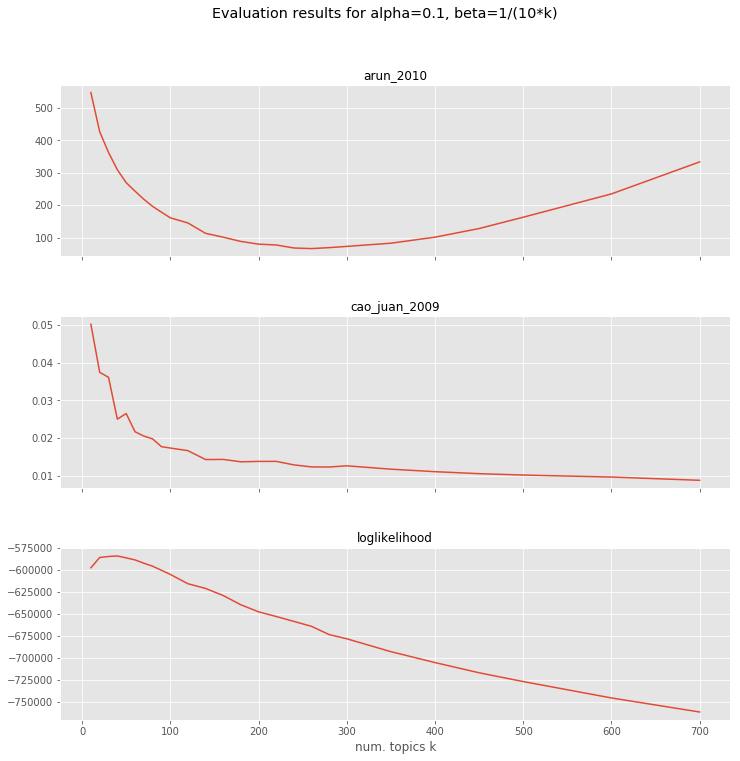

In [23]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 0.1 beta: 0.001

In [24]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 30
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:l

INFO:lda:<50> log likelihood: -615243
INFO:lda:<10> log likelihood: -701517
INFO:lda:<80> log likelihood: -628527
INFO:lda:<20> log likelihood: -636211
INFO:lda:<50> log likelihood: -612310
INFO:lda:<90> log likelihood: -627836
INFO:lda:<40> log likelihood: -614549
INFO:lda:<30> log likelihood: -619826
INFO:lda:<60> log likelihood: -613736
INFO:lda:<30> log likelihood: -626967
INFO:lda:<100> log likelihood: -626890
INFO:lda:<10> log likelihood: -710854
INFO:lda:<10> log likelihood: -686479
INFO:lda:<20> log likelihood: -647316
INFO:lda:<20> log likelihood: -638632
INFO:lda:<70> log likelihood: -612063
INFO:lda:<110> log likelihood: -626400
INFO:lda:<60> log likelihood: -609921
INFO:lda:<10> log likelihood: -726039
INFO:lda:<20> log likelihood: -653944
INFO:lda:<50> log likelihood: -611098
INFO:lda:<120> log likelihood: -625600
INFO:lda:<30> log likelihood: -627892
INFO:lda:<80> log likelihood: -610353
INFO:lda:<40> log likelihood: -616082
INFO:lda:<10> log likelihood: -737240
INFO:lda:

INFO:lda:<520> log likelihood: -618747
INFO:lda:<150> log likelihood: -601634
INFO:lda:<270> log likelihood: -597913
INFO:lda:<380> log likelihood: -600347
INFO:lda:<220> log likelihood: -597945
INFO:lda:<530> log likelihood: -618569
INFO:lda:<50> log likelihood: -667801
INFO:lda:<140> log likelihood: -608063
INFO:lda:<390> log likelihood: -600350
INFO:lda:<280> log likelihood: -597363
INFO:lda:<540> log likelihood: -618265
INFO:lda:<120> log likelihood: -611043
INFO:lda:<190> log likelihood: -598893
INFO:lda:<550> log likelihood: -618024
INFO:lda:<230> log likelihood: -597490
INFO:lda:<400> log likelihood: -599764
INFO:lda:<290> log likelihood: -597611
INFO:lda:<560> log likelihood: -617995
INFO:lda:<110> log likelihood: -614680
INFO:lda:<160> log likelihood: -601491
INFO:lda:<40> log likelihood: -683183
INFO:lda:<570> log likelihood: -618351
INFO:lda:<410> log likelihood: -600129
INFO:lda:<240> log likelihood: -597286
INFO:lda:<70> log likelihood: -642894
INFO:lda:<300> log likelihoo

INFO:lda:<220> log likelihood: -604834
INFO:lda:<500> log likelihood: -595484
INFO:lda:<980> log likelihood: -611908
INFO:lda:<410> log likelihood: -593241
INFO:lda:<190> log likelihood: -609936
INFO:lda:<340> log likelihood: -594679
INFO:lda:<80> log likelihood: -667404
INFO:lda:<100> log likelihood: -644955
INFO:lda:<260> log likelihood: -603955
INFO:lda:<170> log likelihood: -616573
INFO:lda:<700> log likelihood: -598026
INFO:lda:<90> log likelihood: -659486
INFO:lda:<990> log likelihood: -612140
INFO:lda:<120> log likelihood: -636876
INFO:lda:<510> log likelihood: -594984
INFO:lda:<70> log likelihood: -673719
INFO:lda:<290> log likelihood: -596721
INFO:lda:<710> log likelihood: -598292
INFO:lda:<1000> log likelihood: -612012
INFO:lda:<420> log likelihood: -593232
INFO:lda:<520> log likelihood: -594997
INFO:lda:<1010> log likelihood: -612046
INFO:lda:<350> log likelihood: -594826
INFO:lda:<230> log likelihood: -604157
INFO:lda:<720> log likelihood: -598144
INFO:lda:<140> log likelih

INFO:lda:<100> log likelihood: -669520
INFO:lda:<740> log likelihood: -594198
INFO:lda:<410> log likelihood: -594984
INFO:lda:<1400> log likelihood: -609772
INFO:lda:<1000> log likelihood: -596871
INFO:lda:<370> log likelihood: -602342
INFO:lda:<200> log likelihood: -623101
INFO:lda:<1410> log likelihood: -609903
INFO:lda:<600> log likelihood: -591144
INFO:lda:<750> log likelihood: -594601
INFO:lda:<500> log likelihood: -593251
INFO:lda:<1420> log likelihood: -609955
INFO:lda:<280> log likelihood: -607167
INFO:lda:<1010> log likelihood: -596743
INFO:lda:<130> log likelihood: -654382
INFO:lda:<420> log likelihood: -594441
INFO:lda:<1430> log likelihood: -609677
INFO:lda:<760> log likelihood: -594610
INFO:lda:<610> log likelihood: -591647
INFO:lda:<330> log likelihood: -601431
INFO:lda:<1020> log likelihood: -596840
INFO:lda:<250> log likelihood: -613394
INFO:lda:<150> log likelihood: -640677
INFO:lda:<1440> log likelihood: -610292
INFO:lda:<1030> log likelihood: -596804
INFO:lda:<510> l

INFO:lda:<970> log likelihood: -593546
INFO:lda:<260> log likelihood: -620599
INFO:lda:<1830> log likelihood: -609135
INFO:lda:<320> log likelihood: -609690
INFO:lda:<1300> log likelihood: -595714
INFO:lda:<1840> log likelihood: -609169
INFO:lda:<980> log likelihood: -593525
INFO:lda:<780> log likelihood: -590294
INFO:lda:<1310> log likelihood: -596181
INFO:lda:<550> log likelihood: -593337
INFO:lda:<170> log likelihood: -651981
INFO:lda:<660> log likelihood: -592356
INFO:lda:<1850> log likelihood: -609267
INFO:lda:<1860> log likelihood: -609208
INFO:lda:<230> log likelihood: -630802
INFO:lda:<990> log likelihood: -593872
INFO:lda:<1320> log likelihood: -595763
INFO:lda:<370> log likelihood: -604947
INFO:lda:<790> log likelihood: -590149
INFO:lda:<1870> log likelihood: -609196
INFO:lda:<150> log likelihood: -659737
INFO:lda:<490> log likelihood: -600373
INFO:lda:<430> log likelihood: -600450
INFO:lda:<1330> log likelihood: -596057
INFO:lda:<670> log likelihood: -592151
INFO:lda:<1880> 

INFO:lda:<460> log likelihood: -604316
INFO:lda:<600> log likelihood: -599293
INFO:lda:<960> log likelihood: -589419
INFO:lda:<1630> log likelihood: -595157
INFO:lda:<1230> log likelihood: -593083
INFO:lda:<820> log likelihood: -591807
INFO:lda:<330> log likelihood: -619167
INFO:lda:<170> log likelihood: -664144
INFO:lda:<240> log likelihood: -636764
INFO:lda:<1640> log likelihood: -595572
INFO:lda:<970> log likelihood: -589332
INFO:lda:<1240> log likelihood: -593157
INFO:lda:<690> log likelihood: -591882
INFO:lda:<1650> log likelihood: -595482
INFO:lda:<540> log likelihood: -599523
INFO:lda:<610> log likelihood: -598981
INFO:lda:<190> log likelihood: -656494
INFO:lda:<470> log likelihood: -604799
INFO:lda:<830> log likelihood: -591252
INFO:lda:<410> log likelihood: -609099
INFO:lda:<980> log likelihood: -588861
INFO:lda:<1250> log likelihood: -593390
INFO:lda:<290> log likelihood: -628508
INFO:lda:<1660> log likelihood: -595291
INFO:lda:<1670> log likelihood: -595504
INFO:lda:<1260> l

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.035851
INFO:lda:<570> log likelihood: -603609
INFO:lda:<650> log likelihood: -598976
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 422.073087
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.001, 'n_iter': 2000, 'n_topics': 260}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 260
INFO:lda:n_iter: 2000
INFO:lda:<1010> log likelihood: -590619
INFO:lda:<1190> log likelihood: -588320
INFO:lda:<230> log likelihood: -653177
INFO:lda:<1520> log likelihood: -592331
INFO:lda:<740> log likelihood: -598240
INFO:lda:<840> log likelihood: -591028
INFO:lda:<410> log likelihood: -618972
INFO:lda:<210> log likelihood: -661954
INFO:lda:<300> log likelihood: -634766
INFO:lda:<50> log likelihood: -689569
INFO:lda:<1200> log likelihood: -587811
INFO:lda:<1530> log likelihood: -592293
INFO:lda:<510>

INFO:lda:<30> log likelihood: -703557
INFO:lda:<1450> log likelihood: -587392
INFO:lda:<1840> log likelihood: -592058
INFO:lda:<610> log likelihood: -607535
INFO:lda:<280> log likelihood: -651970
INFO:lda:<1020> log likelihood: -591070
INFO:lda:<1850> log likelihood: -591848
INFO:lda:<1230> log likelihood: -590338
INFO:lda:<900> log likelihood: -597575
INFO:lda:<1460> log likelihood: -586911
INFO:lda:<790> log likelihood: -598261
INFO:lda:<700> log likelihood: -603025
INFO:lda:<1860> log likelihood: -591756
INFO:lda:<500> log likelihood: -617830
INFO:lda:<430> log likelihood: -625687
INFO:lda:<1030> log likelihood: -590640
INFO:lda:<1240> log likelihood: -590326
INFO:lda:<620> log likelihood: -607404
INFO:lda:<910> log likelihood: -597464
INFO:lda:<1870> log likelihood: -591849
INFO:lda:<1470> log likelihood: -587104
INFO:lda:<260> log likelihood: -659757
INFO:lda:<800> log likelihood: -598707
INFO:lda:<1880> log likelihood: -592175
INFO:lda:<330> log likelihood: -646911
INFO:lda:<1250

INFO:lda:<1210> log likelihood: -590972
INFO:lda:<1720> log likelihood: -586726
INFO:lda:<1460> log likelihood: -589373
INFO:lda:<510> log likelihood: -624896
INFO:lda:<940> log likelihood: -597849
INFO:lda:<1070> log likelihood: -597046
INFO:lda:<1730> log likelihood: -586977
INFO:lda:<430> log likelihood: -633546
INFO:lda:<1470> log likelihood: -589144
INFO:lda:<1220> log likelihood: -590749
INFO:lda:<830> log likelihood: -602484
INFO:lda:<730> log likelihood: -606457
INFO:lda:<1740> log likelihood: -587170
INFO:lda:<950> log likelihood: -597398
INFO:lda:<600> log likelihood: -615745
INFO:lda:<140> log likelihood: -673300
INFO:lda:<1480> log likelihood: -589586
INFO:lda:<1080> log likelihood: -597048
INFO:lda:<310> log likelihood: -658483
INFO:lda:<1750> log likelihood: -587123
INFO:lda:<1230> log likelihood: -590556
INFO:lda:<840> log likelihood: -602326
INFO:lda:<340> log likelihood: -651044
INFO:lda:<520> log likelihood: -624283
INFO:lda:<1490> log likelihood: -589098
INFO:lda:<39

INFO:lda:<1420> log likelihood: -590768
INFO:lda:<1100> log likelihood: -597707
INFO:lda:<1720> log likelihood: -589247
INFO:lda:<360> log likelihood: -657379
INFO:lda:<600> log likelihood: -622882
INFO:lda:<700> log likelihood: -615476
INFO:lda:<1250> log likelihood: -597011
INFO:lda:<1430> log likelihood: -590704
INFO:lda:<980> log likelihood: -602102
INFO:lda:<1730> log likelihood: -589060
INFO:lda:<860> log likelihood: -606125
INFO:lda:<1110> log likelihood: -597377
INFO:lda:<450> log likelihood: -645043
INFO:lda:<1440> log likelihood: -591351
INFO:lda:<510> log likelihood: -633022
INFO:lda:<120> log likelihood: -679272
INFO:lda:<1260> log likelihood: -596550
INFO:lda:<1740> log likelihood: -588877
INFO:lda:<0> log likelihood: -1501702
INFO:lda:<190> log likelihood: -670317
INFO:lda:<990> log likelihood: -602635
INFO:lda:<1450> log likelihood: -590634
INFO:lda:<1750> log likelihood: -588622
INFO:lda:<610> log likelihood: -623298
INFO:lda:<710> log likelihood: -615147
INFO:lda:<400>

INFO:lda:<520> log likelihood: -644583
INFO:lda:<1460> log likelihood: -596168
INFO:lda:<700> log likelihood: -622786
INFO:lda:<1670> log likelihood: -590571
INFO:lda:<1140> log likelihood: -602492
INFO:lda:<1290> log likelihood: -597001
INFO:lda:<40> log likelihood: -711102
INFO:lda:<420> log likelihood: -656746
INFO:lda:<820> log likelihood: -614663
INFO:lda:<1000> log likelihood: -605533
INFO:lda:<1470> log likelihood: -595978
INFO:lda:<1680> log likelihood: -590521
INFO:lda:<1300> log likelihood: -597075
INFO:lda:<1150> log likelihood: -601944
INFO:lda:<1690> log likelihood: -590253
INFO:lda:<1480> log likelihood: -596348
INFO:lda:<170> log likelihood: -677955
INFO:lda:<600> log likelihood: -632455
INFO:lda:<710> log likelihood: -622395
INFO:lda:<0> log likelihood: -1523296
INFO:lda:<470> log likelihood: -648869
INFO:lda:<1010> log likelihood: -606016
INFO:lda:<830> log likelihood: -614467
INFO:lda:<1700> log likelihood: -590181
INFO:lda:<530> log likelihood: -644765
INFO:lda:<1310

INFO:lda:<1180> log likelihood: -605392
INFO:lda:<1720> log likelihood: -595890
INFO:lda:<160> log likelihood: -685418
INFO:lda:<700> log likelihood: -632201
INFO:lda:<1340> log likelihood: -601548
INFO:lda:<1970> log likelihood: -589891
INFO:lda:<310> log likelihood: -667084
INFO:lda:<1510> log likelihood: -595995
INFO:lda:<1730> log likelihood: -595729
INFO:lda:<1980> log likelihood: -589596
INFO:lda:<1190> log likelihood: -605257
INFO:lda:<550> log likelihood: -647909
INFO:lda:<970> log likelihood: -613728
INFO:lda:<830> log likelihood: -621903
INFO:lda:<1350> log likelihood: -601647
INFO:lda:<620> log likelihood: -643441
INFO:lda:<1520> log likelihood: -595933
INFO:lda:<1990> log likelihood: -590183
INFO:lda:<1740> log likelihood: -595688
INFO:lda:<1200> log likelihood: -604989
INFO:lda:<230> log likelihood: -675040
INFO:lda:<1360> log likelihood: -601382
INFO:lda:<1999> log likelihood: -589842
INFO:lda:<710> log likelihood: -631644
INFO:tmtoolkit:> evaluation result with metric "l

INFO:lda:<90> log likelihood: -712922
INFO:lda:<1990> log likelihood: -595411
INFO:lda:<220> log likelihood: -682524
INFO:lda:<1120> log likelihood: -613235
INFO:lda:<1750> log likelihood: -595761
INFO:lda:<1560> log likelihood: -601678
INFO:lda:<290> log likelihood: -673540
INFO:lda:<1999> log likelihood: -595302
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -595410.857184
INFO:lda:<150> log likelihood: -694439
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.020549
INFO:lda:<1380> log likelihood: -605631
INFO:lda:<1760> log likelihood: -595938
INFO:lda:<640> log likelihood: -647115
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 216.615283
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.1, 'eta': 0.001, 'n_iter': 2000, 'n_topics': 450}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 450
INFO:lda:n_iter: 2000
INFO:lda:<9

INFO:lda:<930> log likelihood: -631092
INFO:lda:<1290> log likelihood: -613758
INFO:lda:<650> log likelihood: -654478
INFO:lda:<1790> log likelihood: -600438
INFO:lda:<820> log likelihood: -643481
INFO:lda:<1580> log likelihood: -604787
INFO:lda:<0> log likelihood: -1566494
INFO:lda:<1100> log likelihood: -621879
INFO:lda:<360> log likelihood: -672786
INFO:lda:<1800> log likelihood: -601132
INFO:lda:<80> log likelihood: -727901
INFO:lda:<730> log likelihood: -646612
INFO:lda:<210> log likelihood: -691106
INFO:lda:<1300> log likelihood: -613025
INFO:lda:<1590> log likelihood: -604755
INFO:lda:<940> log likelihood: -630770
INFO:lda:<290> log likelihood: -681010
INFO:lda:<460> log likelihood: -664634
INFO:lda:<1810> log likelihood: -600829
INFO:lda:<830> log likelihood: -642852
INFO:lda:<1110> log likelihood: -621955
INFO:lda:<660> log likelihood: -654025
INFO:lda:<1310> log likelihood: -612863
INFO:lda:<1820> log likelihood: -601291
INFO:lda:<1600> log likelihood: -605250
INFO:lda:<150> 

INFO:lda:<840> log likelihood: -645351
INFO:lda:<950> log likelihood: -642514
INFO:lda:<1270> log likelihood: -621140
INFO:lda:<1840> log likelihood: -605241
INFO:lda:<550> log likelihood: -663641
INFO:lda:<1090> log likelihood: -631444
INFO:lda:<1510> log likelihood: -612436
INFO:lda:<1850> log likelihood: -605087
INFO:lda:<760> log likelihood: -653998
INFO:lda:<450> log likelihood: -671374
INFO:lda:<370> log likelihood: -679810
INFO:lda:<1280> log likelihood: -621700
INFO:lda:<210> log likelihood: -704702
INFO:lda:<960> log likelihood: -642108
INFO:lda:<1100> log likelihood: -631363
INFO:lda:<1860> log likelihood: -605477
INFO:lda:<1520> log likelihood: -612811
INFO:lda:<850> log likelihood: -645947
INFO:lda:<10> log likelihood: -850076
INFO:lda:<290> log likelihood: -687382
INFO:lda:<1290> log likelihood: -621354
INFO:lda:<560> log likelihood: -663398
INFO:lda:<1870> log likelihood: -604924
INFO:lda:<1530> log likelihood: -612588
INFO:lda:<770> log likelihood: -653853
INFO:lda:<1110

INFO:lda:<1480> log likelihood: -620885
INFO:lda:<1270> log likelihood: -630975
INFO:lda:<550> log likelihood: -669934
INFO:lda:<980> log likelihood: -645316
INFO:lda:<140> log likelihood: -734739
INFO:lda:<1760> log likelihood: -612236
INFO:lda:<1110> log likelihood: -640507
INFO:lda:<50> log likelihood: -778264
INFO:lda:<200> log likelihood: -717225
INFO:lda:<1490> log likelihood: -620773
INFO:lda:<1770> log likelihood: -612873
INFO:lda:<890> log likelihood: -652824
INFO:lda:<1280> log likelihood: -630980
INFO:lda:<380> log likelihood: -685301
INFO:lda:<670> log likelihood: -662127
INFO:lda:<470> log likelihood: -678585
INFO:lda:<1120> log likelihood: -640206
INFO:lda:<990> log likelihood: -644976
INFO:lda:<1500> log likelihood: -621577
INFO:lda:<1780> log likelihood: -612779
INFO:lda:<560> log likelihood: -670385
INFO:lda:<100> log likelihood: -750188
INFO:lda:<290> log likelihood: -702165
INFO:lda:<1290> log likelihood: -630671
INFO:lda:<1510> log likelihood: -620977
INFO:lda:<1790

INFO:lda:<1280> log likelihood: -640141
INFO:lda:<1730> log likelihood: -620829
INFO:lda:<1480> log likelihood: -629781
INFO:lda:<480> log likelihood: -682809
INFO:lda:<670> log likelihood: -668638
INFO:lda:<1140> log likelihood: -644888
INFO:lda:<1740> log likelihood: -620991
INFO:lda:<370> log likelihood: -699442
INFO:lda:<580> log likelihood: -676868
INFO:lda:<800> log likelihood: -661684
INFO:lda:<100> log likelihood: -769329
INFO:lda:<1490> log likelihood: -629539
INFO:lda:<1030> log likelihood: -653635
INFO:lda:<1290> log likelihood: -640472
INFO:lda:<1750> log likelihood: -621221
INFO:lda:<210> log likelihood: -730249
INFO:lda:<1150> log likelihood: -645206
INFO:lda:<280> log likelihood: -714625
INFO:lda:<60> log likelihood: -793139
INFO:lda:<160> log likelihood: -744091
INFO:lda:<680> log likelihood: -667793
INFO:lda:<1500> log likelihood: -629689
INFO:lda:<490> log likelihood: -682021
INFO:lda:<1760> log likelihood: -620853
INFO:lda:<1300> log likelihood: -640323
INFO:lda:<810

INFO:tmtoolkit:> evaluation result with metric "arun_2010": 116.694640
INFO:lda:<280> log likelihood: -728362
INFO:lda:<1320> log likelihood: -644752
INFO:lda:<1720> log likelihood: -629719
INFO:lda:<360> log likelihood: -713544
INFO:lda:<1490> log likelihood: -638235
INFO:lda:<1190> log likelihood: -651674
INFO:lda:<950> log likelihood: -660379
INFO:lda:<810> log likelihood: -666916
INFO:lda:<1730> log likelihood: -629300
INFO:lda:<600> log likelihood: -680757
INFO:lda:<710> log likelihood: -675912
INFO:lda:<1330> log likelihood: -645253
INFO:lda:<1500> log likelihood: -638773
INFO:lda:<470> log likelihood: -697516
INFO:lda:<1200> log likelihood: -652281
INFO:lda:<1740> log likelihood: -630055
INFO:lda:<160> log likelihood: -765421
INFO:lda:<1510> log likelihood: -638264
INFO:lda:<960> log likelihood: -660054
INFO:lda:<110> log likelihood: -786193
INFO:lda:<820> log likelihood: -666172
INFO:lda:<1340> log likelihood: -645999
INFO:lda:<290> log likelihood: -729264
INFO:lda:<370> log li

INFO:lda:<1380> log likelihood: -651498
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.016733
INFO:lda:<1730> log likelihood: -638596
INFO:lda:<220> log likelihood: -762130
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 105.056303
INFO:lda:<160> log likelihood: -781680
INFO:lda:<370> log likelihood: -726433
INFO:lda:<1120> log likelihood: -660050
INFO:lda:<1540> log likelihood: -644939
INFO:lda:<1740> log likelihood: -638458
INFO:lda:<970> log likelihood: -665453
INFO:lda:<460> log likelihood: -711919
INFO:lda:<300> log likelihood: -737680
INFO:lda:<740> log likelihood: -680277
INFO:lda:<1390> log likelihood: -651698
INFO:lda:<850> log likelihood: -674416
INFO:lda:<1550> log likelihood: -644540
INFO:lda:<590> log likelihood: -696901
INFO:lda:<1750> log likelihood: -637862
INFO:lda:<1130> log likelihood: -659747
INFO:lda:<1400> log likelihood: -651051
INFO:lda:<980> log likelihood: -665206
INFO:lda:<750> log likelihood: -680241
INFO:lda:<1760> log likelih

INFO:lda:<710> log likelihood: -696111
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 92.892564
INFO:lda:<890> log likelihood: -679249
INFO:lda:<1600> log likelihood: -651711
INFO:lda:<1010> log likelihood: -673885
INFO:lda:<570> log likelihood: -710111
INFO:lda:<1780> log likelihood: -644594
INFO:lda:<470> log likelihood: -725669
INFO:lda:<1150> log likelihood: -665152
INFO:lda:<1320> log likelihood: -659281
INFO:lda:<1610> log likelihood: -651536
INFO:lda:<390> log likelihood: -735501
INFO:lda:<1790> log likelihood: -644785
INFO:lda:<720> log likelihood: -695652
INFO:lda:<1020> log likelihood: -674435
INFO:lda:<900> log likelihood: -679406
INFO:lda:<1160> log likelihood: -665394
INFO:lda:<1330> log likelihood: -659792
INFO:lda:<300> log likelihood: -760076
INFO:lda:<1620> log likelihood: -651361
INFO:lda:<1800> log likelihood: -644390
INFO:lda:<580> log likelihood: -709465
INFO:lda:<480> log likelihood: -725207
INFO:lda:<230> log likelihood: -779163
INFO:lda:<1170> log l

INFO:lda:<1360> log likelihood: -665304
INFO:lda:<490> log likelihood: -734140
INFO:lda:<1860> log likelihood: -650679
INFO:lda:<1550> log likelihood: -658555
INFO:lda:<1210> log likelihood: -673335
INFO:lda:<870> log likelihood: -695790
INFO:lda:<1370> log likelihood: -665141
INFO:lda:<590> log likelihood: -724351
INFO:lda:<1080> log likelihood: -679060
INFO:lda:<1870> log likelihood: -650740
INFO:lda:<1560> log likelihood: -658868
INFO:lda:<300> log likelihood: -778009
INFO:lda:<710> log likelihood: -708632
INFO:lda:<1220> log likelihood: -673323
INFO:lda:<1880> log likelihood: -649994
INFO:lda:<1380> log likelihood: -664935
INFO:lda:<880> log likelihood: -695552
INFO:lda:<500> log likelihood: -733842
INFO:lda:<1570> log likelihood: -659120
INFO:lda:<390> log likelihood: -758839
INFO:lda:<1090> log likelihood: -679149
INFO:lda:<1890> log likelihood: -650774
INFO:lda:<1230> log likelihood: -673289
INFO:lda:<600> log likelihood: -724363
INFO:lda:<720> log likelihood: -708922
INFO:lda:<

INFO:lda:<1840> log likelihood: -658085
INFO:lda:<870> log likelihood: -707368
INFO:lda:<1060> log likelihood: -693408
INFO:lda:<1300> log likelihood: -680033
INFO:lda:<490> log likelihood: -757430
INFO:lda:<390> log likelihood: -776394
INFO:lda:<1640> log likelihood: -664161
INFO:lda:<1460> log likelihood: -672491
INFO:lda:<1850> log likelihood: -658865
INFO:lda:<740> log likelihood: -722597
INFO:lda:<1310> log likelihood: -678951
INFO:lda:<1070> log likelihood: -693590
INFO:lda:<1650> log likelihood: -664442
INFO:lda:<630> log likelihood: -731597
INFO:lda:<880> log likelihood: -708238
INFO:lda:<1470> log likelihood: -671985
INFO:lda:<1860> log likelihood: -658969
INFO:lda:<1320> log likelihood: -679446
INFO:lda:<500> log likelihood: -756475
INFO:lda:<1660> log likelihood: -664294
INFO:lda:<1870> log likelihood: -658462
INFO:lda:<1080> log likelihood: -693930
INFO:lda:<1480> log likelihood: -672423
INFO:lda:<750> log likelihood: -722159
INFO:lda:<890> log likelihood: -707334
INFO:lda:

INFO:lda:<1560> log likelihood: -679371
INFO:lda:<1740> log likelihood: -671121
INFO:lda:<1950> log likelihood: -664447
INFO:lda:<620> log likelihood: -755572
INFO:lda:<1570> log likelihood: -679374
INFO:lda:<1290> log likelihood: -693675
INFO:lda:<1070> log likelihood: -707249
INFO:lda:<910> log likelihood: -721671
INFO:lda:<780> log likelihood: -731961
INFO:lda:<1750> log likelihood: -671618
INFO:lda:<500> log likelihood: -775384
INFO:lda:<1960> log likelihood: -664410
INFO:lda:<1580> log likelihood: -679780
INFO:lda:<1300> log likelihood: -693996
INFO:lda:<1970> log likelihood: -664132
INFO:lda:<1760> log likelihood: -671890
INFO:lda:<1080> log likelihood: -707578
INFO:lda:<920> log likelihood: -721548
INFO:lda:<1590> log likelihood: -679852
INFO:lda:<630> log likelihood: -756458
INFO:lda:<790> log likelihood: -731814
INFO:lda:<1980> log likelihood: -663928
INFO:lda:<1310> log likelihood: -693478
INFO:lda:<1770> log likelihood: -671596
INFO:lda:<1090> log likelihood: -707380
INFO:ld

INFO:lda:<1580> log likelihood: -693255
INFO:lda:<1910> log likelihood: -679117
INFO:lda:<1320> log likelihood: -706719
INFO:lda:<640> log likelihood: -772611
INFO:lda:<980> log likelihood: -730929
INFO:lda:<1920> log likelihood: -679434
INFO:lda:<1590> log likelihood: -693258
INFO:lda:<790> log likelihood: -753188
INFO:lda:<1140> log likelihood: -720741
INFO:lda:<1330> log likelihood: -706225
INFO:lda:<1930> log likelihood: -679176
INFO:lda:<1600> log likelihood: -693650
INFO:lda:<990> log likelihood: -730661
INFO:lda:<1340> log likelihood: -706927
INFO:lda:<1150> log likelihood: -719555
INFO:lda:<1940> log likelihood: -679279
INFO:lda:<800> log likelihood: -754221
INFO:lda:<650> log likelihood: -772993
INFO:lda:<1610> log likelihood: -693359
INFO:lda:<1950> log likelihood: -678774
INFO:lda:<1350> log likelihood: -706381
INFO:lda:<1000> log likelihood: -731070
INFO:lda:<1160> log likelihood: -720282
INFO:lda:<1620> log likelihood: -693632
INFO:lda:<1960> log likelihood: -678793
INFO:l

INFO:lda:<1460> log likelihood: -719502
INFO:lda:<1690> log likelihood: -706268
INFO:lda:<1270> log likelihood: -729984
INFO:lda:<1030> log likelihood: -751759
INFO:lda:<1700> log likelihood: -705680
INFO:lda:<850> log likelihood: -770121
INFO:lda:<1470> log likelihood: -719051
INFO:lda:<1280> log likelihood: -729799
INFO:lda:<1040> log likelihood: -751908
INFO:lda:<1710> log likelihood: -704894
INFO:lda:<1480> log likelihood: -719485
INFO:lda:<860> log likelihood: -769548
INFO:lda:<1290> log likelihood: -730219
INFO:lda:<1720> log likelihood: -705025
INFO:lda:<1490> log likelihood: -719348
INFO:lda:<1050> log likelihood: -751302
INFO:lda:<1730> log likelihood: -705855
INFO:lda:<1300> log likelihood: -730090
INFO:lda:<1500> log likelihood: -719435
INFO:lda:<870> log likelihood: -769220
INFO:lda:<1740> log likelihood: -705504
INFO:lda:<1060> log likelihood: -751396
INFO:lda:<1310> log likelihood: -729732
INFO:lda:<1510> log likelihood: -720112
INFO:lda:<1750> log likelihood: -706301
INF

INFO:lda:<1170> log likelihood: -769458
INFO:lda:<1410> log likelihood: -750689
INFO:lda:<1730> log likelihood: -729535
INFO:lda:<1980> log likelihood: -718383
INFO:lda:<1740> log likelihood: -730047
INFO:lda:<1180> log likelihood: -770050
INFO:lda:<1420> log likelihood: -751135
INFO:lda:<1990> log likelihood: -718747
INFO:lda:<1750> log likelihood: -729285
INFO:lda:<1999> log likelihood: -718674
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -718746.942801
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.013735
INFO:lda:<1430> log likelihood: -751398
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 114.368518
INFO:lda:<1190> log likelihood: -768529
INFO:lda:<1760> log likelihood: -729526
INFO:lda:<1440> log likelihood: -750940
INFO:lda:<1200> log likelihood: -769289
INFO:lda:<1770> log likelihood: -729837
INFO:lda:<1450> log likelihood: -751255
INFO:lda:<1780> log likelihood: -730097
INFO:lda:<1210> log likelihood: -769901
INFO:lda:<1460> l

plotting evaluation results


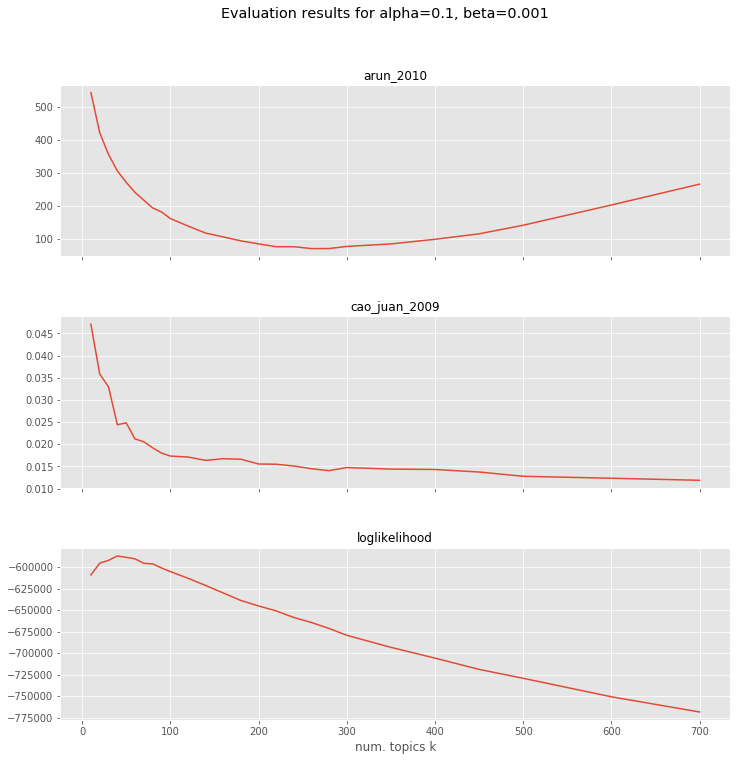

In [25]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 1/(10*k)

In [26]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 60
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 80
INFO:lda:n_topics: 120
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 10
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INF

INFO:lda:<20> log likelihood: -602717
INFO:lda:<60> log likelihood: -583845
INFO:lda:<20> log likelihood: -600794
INFO:lda:<50> log likelihood: -577033
INFO:lda:<10> log likelihood: -668402
INFO:lda:<20> log likelihood: -609003
INFO:lda:<80> log likelihood: -604212
INFO:lda:<70> log likelihood: -581841
INFO:lda:<10> log likelihood: -662701
INFO:lda:<30> log likelihood: -588921
INFO:lda:<10> log likelihood: -663288
INFO:lda:<30> log likelihood: -580333
INFO:lda:<60> log likelihood: -574110
INFO:lda:<90> log likelihood: -603459
INFO:lda:<20> log likelihood: -603104
INFO:lda:<80> log likelihood: -580707
INFO:lda:<30> log likelihood: -586810
INFO:lda:<100> log likelihood: -603193
INFO:lda:<20> log likelihood: -607615
INFO:lda:<40> log likelihood: -579141
INFO:lda:<90> log likelihood: -579228
INFO:lda:<110> log likelihood: -602787
INFO:lda:<30> log likelihood: -581665
INFO:lda:<70> log likelihood: -572766
INFO:lda:<10> log likelihood: -671519
INFO:lda:<120> log likelihood: -602652
INFO:lda:

INFO:lda:<520> log likelihood: -599875
INFO:lda:<280> log likelihood: -562235
INFO:lda:<150> log likelihood: -546628
INFO:lda:<380> log likelihood: -571065
INFO:lda:<530> log likelihood: -599541
INFO:lda:<220> log likelihood: -554547
INFO:lda:<180> log likelihood: -550242
INFO:lda:<390> log likelihood: -570741
INFO:lda:<50> log likelihood: -565345
INFO:lda:<40> log likelihood: -573543
INFO:lda:<540> log likelihood: -599782
INFO:lda:<120> log likelihood: -546710
INFO:lda:<290> log likelihood: -562290
INFO:lda:<140> log likelihood: -546105
INFO:lda:<60> log likelihood: -561720
INFO:lda:<550> log likelihood: -600138
INFO:lda:<400> log likelihood: -570307
INFO:lda:<80> log likelihood: -553079
INFO:lda:<300> log likelihood: -562125
INFO:lda:<230> log likelihood: -554381
INFO:lda:<160> log likelihood: -546062
INFO:lda:<560> log likelihood: -599578
INFO:lda:<70> log likelihood: -559950
INFO:lda:<110> log likelihood: -545212
INFO:lda:<190> log likelihood: -549414
INFO:lda:<100> log likelihood:

INFO:lda:<70> log likelihood: -557382
INFO:lda:<190> log likelihood: -537329
INFO:lda:<280> log likelihood: -541767
INFO:lda:<170> log likelihood: -544138
INFO:lda:<510> log likelihood: -560150
INFO:lda:<690> log likelihood: -569764
INFO:lda:<970> log likelihood: -598271
INFO:lda:<90> log likelihood: -551184
INFO:lda:<410> log likelihood: -552307
INFO:lda:<340> log likelihood: -546865
INFO:lda:<250> log likelihood: -541517
INFO:lda:<980> log likelihood: -598099
INFO:lda:<520> log likelihood: -560023
INFO:lda:<700> log likelihood: -569678
INFO:lda:<990> log likelihood: -598398
INFO:lda:<710> log likelihood: -570233
INFO:lda:<220> log likelihood: -538720
INFO:lda:<420> log likelihood: -552419
INFO:lda:<110> log likelihood: -548035
INFO:lda:<1000> log likelihood: -598159
INFO:lda:<290> log likelihood: -541569
INFO:lda:<530> log likelihood: -559902
INFO:lda:<350> log likelihood: -546612
INFO:lda:<80> log likelihood: -552495
INFO:lda:<720> log likelihood: -569922
INFO:lda:<1010> log likelih

INFO:lda:<590> log likelihood: -551944
INFO:lda:<490> log likelihood: -545501
INFO:lda:<310> log likelihood: -535919
INFO:lda:<1000> log likelihood: -569496
INFO:lda:<410> log likelihood: -540612
INFO:lda:<1410> log likelihood: -598015
INFO:lda:<180> log likelihood: -538666
INFO:lda:<1010> log likelihood: -569581
INFO:lda:<1420> log likelihood: -597977
INFO:lda:<250> log likelihood: -540157
INFO:lda:<740> log likelihood: -559533
INFO:lda:<600> log likelihood: -551720
INFO:lda:<360> log likelihood: -538713
INFO:lda:<500> log likelihood: -545642
INFO:lda:<1020> log likelihood: -570136
INFO:lda:<210> log likelihood: -536562
INFO:lda:<1430> log likelihood: -597784
INFO:lda:<280> log likelihood: -533759
INFO:lda:<420> log likelihood: -540147
INFO:lda:<750> log likelihood: -559115
INFO:lda:<610> log likelihood: -551040
INFO:lda:<1030> log likelihood: -569726
INFO:lda:<1440> log likelihood: -598065
INFO:lda:<320> log likelihood: -535622
INFO:lda:<1450> log likelihood: -598064
INFO:lda:<510> l

INFO:lda:<1840> log likelihood: -597595
INFO:lda:<540> log likelihood: -538619
INFO:lda:<780> log likelihood: -550909
INFO:lda:<330> log likelihood: -536516
INFO:lda:<1310> log likelihood: -569283
INFO:lda:<960> log likelihood: -558843
INFO:lda:<1850> log likelihood: -597356
INFO:lda:<1860> log likelihood: -597456
INFO:lda:<270> log likelihood: -533939
INFO:lda:<360> log likelihood: -531410
INFO:lda:<1320> log likelihood: -569556
INFO:lda:<1870> log likelihood: -597307
INFO:lda:<970> log likelihood: -558915
INFO:lda:<470> log likelihood: -536395
INFO:lda:<660> log likelihood: -544244
INFO:lda:<790> log likelihood: -550594
INFO:lda:<1880> log likelihood: -597321
INFO:lda:<1330> log likelihood: -569282
INFO:lda:<550> log likelihood: -538673
INFO:lda:<200> log likelihood: -538088
INFO:lda:<1890> log likelihood: -597390
INFO:lda:<980> log likelihood: -558746
INFO:lda:<1340> log likelihood: -569267
INFO:lda:<420> log likelihood: -534495
INFO:lda:<1900> log likelihood: -597459
INFO:lda:<670>

INFO:lda:<680> log likelihood: -537709
INFO:lda:<970> log likelihood: -550473
INFO:lda:<290> log likelihood: -532988
INFO:lda:<1650> log likelihood: -569393
INFO:lda:<820> log likelihood: -543314
INFO:lda:<1210> log likelihood: -558567
INFO:lda:<1660> log likelihood: -568977
INFO:lda:<520> log likelihood: -533248
INFO:lda:<980> log likelihood: -550392
INFO:lda:<690> log likelihood: -537864
INFO:lda:<590> log likelihood: -536451
INFO:lda:<1670> log likelihood: -568971
INFO:lda:<1220> log likelihood: -558779
INFO:lda:<170> log likelihood: -537217
INFO:lda:<250> log likelihood: -535310
INFO:lda:<340> log likelihood: -531580
INFO:lda:<450> log likelihood: -530674
INFO:lda:<830> log likelihood: -543336
INFO:lda:<1680> log likelihood: -569223
INFO:lda:<990> log likelihood: -550697
INFO:lda:<220> log likelihood: -535452
INFO:lda:<1230> log likelihood: -558602
INFO:lda:<1690> log likelihood: -568838
INFO:lda:<420> log likelihood: -533868
INFO:lda:<700> log likelihood: -537778
INFO:lda:<530> lo

INFO:lda:n_iter: 2000
INFO:lda:<300> log likelihood: -533781
INFO:lda:<1470> log likelihood: -558244
INFO:lda:<500> log likelihood: -532619
INFO:lda:<990> log likelihood: -543476
INFO:lda:<1190> log likelihood: -549757
INFO:lda:<840> log likelihood: -537178
INFO:lda:<710> log likelihood: -535362
INFO:lda:<1480> log likelihood: -558667
INFO:lda:<640> log likelihood: -532847
INFO:lda:<1490> log likelihood: -558465
INFO:lda:<550> log likelihood: -529337
INFO:lda:<1200> log likelihood: -549694
INFO:lda:<1000> log likelihood: -543173
INFO:lda:<850> log likelihood: -537216
INFO:lda:<360> log likelihood: -530290
INFO:lda:<510> log likelihood: -532026
INFO:lda:<720> log likelihood: -535762
INFO:lda:<1500> log likelihood: -558189
INFO:lda:<1210> log likelihood: -549752
INFO:lda:<270> log likelihood: -533379
INFO:lda:<230> log likelihood: -534032
INFO:lda:<420> log likelihood: -530621
INFO:lda:<1510> log likelihood: -558218
INFO:lda:<210> log likelihood: -534340
INFO:lda:<1010> log likelihood: -

INFO:lda:<30> log likelihood: -589492
INFO:lda:<1830> log likelihood: -558036
INFO:lda:<370> log likelihood: -531489
INFO:lda:<1470> log likelihood: -549393
INFO:lda:<1040> log likelihood: -536394
INFO:lda:<620> log likelihood: -531156
INFO:lda:<1210> log likelihood: -542698
INFO:lda:<680> log likelihood: -529115
INFO:lda:<1840> log likelihood: -558944
INFO:lda:<280> log likelihood: -530885
INFO:lda:<870> log likelihood: -534491
INFO:lda:<510> log likelihood: -528884
INFO:lda:<1480> log likelihood: -549994
INFO:lda:<1850> log likelihood: -558375
INFO:lda:<780> log likelihood: -531887
INFO:lda:<1050> log likelihood: -536310
INFO:lda:<1220> log likelihood: -542636
INFO:lda:<440> log likelihood: -528252
INFO:lda:<90> log likelihood: -557045
INFO:lda:<1860> log likelihood: -558295
INFO:lda:<1490> log likelihood: -549720
INFO:lda:<630> log likelihood: -531442
INFO:lda:<690> log likelihood: -528906
INFO:lda:<880> log likelihood: -534416
INFO:lda:<1230> log likelihood: -542731
INFO:lda:<1870>

INFO:lda:<300> log likelihood: -529265
INFO:lda:<730> log likelihood: -530515
INFO:lda:<1750> log likelihood: -549358
INFO:lda:<1030> log likelihood: -533669
INFO:lda:<130> log likelihood: -547431
INFO:lda:<1230> log likelihood: -536279
INFO:lda:<1440> log likelihood: -542145
INFO:lda:<810> log likelihood: -527817
INFO:lda:<920> log likelihood: -531923
INFO:lda:<1760> log likelihood: -549398
INFO:lda:<520> log likelihood: -526751
INFO:lda:<440> log likelihood: -529658
INFO:lda:<1040> log likelihood: -533888
INFO:lda:<1450> log likelihood: -542365
INFO:lda:<1770> log likelihood: -549469
INFO:lda:<1240> log likelihood: -536188
INFO:lda:<740> log likelihood: -530382
INFO:lda:<390> log likelihood: -529588
INFO:lda:<610> log likelihood: -527703
INFO:lda:<1460> log likelihood: -542200
INFO:lda:<820> log likelihood: -528012
INFO:lda:<930> log likelihood: -531611
INFO:lda:<1780> log likelihood: -549449
INFO:lda:<1050> log likelihood: -533720
INFO:lda:<1250> log likelihood: -535940
INFO:lda:<14

INFO:lda:<950> log likelihood: -527106
INFO:lda:<600> log likelihood: -525183
INFO:lda:<0> log likelihood: -1670454
INFO:lda:<1680> log likelihood: -541559
INFO:lda:<1450> log likelihood: -535323
INFO:lda:<1090> log likelihood: -531281
INFO:lda:<1220> log likelihood: -533226
INFO:lda:<870> log likelihood: -529761
INFO:lda:<180> log likelihood: -540585
INFO:lda:<520> log likelihood: -527500
INFO:lda:<1690> log likelihood: -542296
INFO:lda:<960> log likelihood: -527694
INFO:lda:<1460> log likelihood: -534982
INFO:lda:<710> log likelihood: -526750
INFO:lda:<360> log likelihood: -527486
INFO:lda:<1230> log likelihood: -533193
INFO:lda:<1100> log likelihood: -531292
INFO:lda:<1700> log likelihood: -541637
INFO:lda:<610> log likelihood: -524886
INFO:lda:<460> log likelihood: -528033
INFO:lda:<1470> log likelihood: -535155
INFO:lda:<970> log likelihood: -527664
INFO:lda:<1710> log likelihood: -541887
INFO:lda:<880> log likelihood: -530007
INFO:lda:<120> log likelihood: -549470
INFO:lda:<1240>

INFO:lda:<420> log likelihood: -525512
INFO:lda:<1710> log likelihood: -534900
INFO:lda:<1130> log likelihood: -527150
INFO:lda:<710> log likelihood: -523832
INFO:lda:<1440> log likelihood: -533072
INFO:lda:<170> log likelihood: -542757
INFO:lda:<610> log likelihood: -525911
INFO:lda:<1990> log likelihood: -541837
INFO:lda:<240> log likelihood: -535560
INFO:lda:<1720> log likelihood: -535213
INFO:lda:<1290> log likelihood: -530853
INFO:lda:<1030> log likelihood: -529449
INFO:lda:<840> log likelihood: -525780
INFO:lda:<540> log likelihood: -527035
INFO:lda:<1999> log likelihood: -541798
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -541837.242416
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.037722
INFO:lda:<1450> log likelihood: -533013
INFO:lda:<1140> log likelihood: -526904
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 298.529282
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameter

INFO:lda:<1990> log likelihood: -534506
INFO:lda:<490> log likelihood: -524382
INFO:lda:<1490> log likelihood: -530194
INFO:lda:<540> log likelihood: -525623
INFO:lda:<1320> log likelihood: -527144
INFO:lda:<710> log likelihood: -525176
INFO:lda:<970> log likelihood: -524336
INFO:lda:<1690> log likelihood: -532693
INFO:lda:<1190> log likelihood: -528862
INFO:lda:<300> log likelihood: -532189
INFO:lda:<1999> log likelihood: -534707
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -534505.935728
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.032687
INFO:lda:<100> log likelihood: -554231
INFO:lda:<1500> log likelihood: -530060
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 259.648646
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.0025, 'eta': 0.00025, 'n_iter': 2000, 'n_topics': 400}
INFO:lda:n_documents: 18049
INFO:lda:<830> log likelihood: -522746
INFO:lda:vocab_size: 6

INFO:lda:<1530> log likelihood: -526306
INFO:lda:<1730> log likelihood: -530093
INFO:lda:<570> log likelihood: -523013
INFO:lda:<1960> log likelihood: -532344
INFO:lda:<370> log likelihood: -529381
INFO:lda:<960> log likelihood: -522502
INFO:lda:<1380> log likelihood: -527615
INFO:lda:<630> log likelihood: -524495
INFO:lda:<290> log likelihood: -532190
INFO:lda:<1970> log likelihood: -532494
INFO:lda:<830> log likelihood: -524164
INFO:lda:<1130> log likelihood: -524040
INFO:lda:<1740> log likelihood: -529568
INFO:lda:<1540> log likelihood: -526599
INFO:lda:<1390> log likelihood: -527793
INFO:lda:<1980> log likelihood: -532261
INFO:lda:<160> log likelihood: -542328
INFO:lda:<730> log likelihood: -524718
INFO:lda:<970> log likelihood: -522460
INFO:lda:<1550> log likelihood: -526392
INFO:lda:<1750> log likelihood: -529722
INFO:lda:<1990> log likelihood: -532333
INFO:lda:<1140> log likelihood: -523653
INFO:lda:<1400> log likelihood: -527618
INFO:lda:<220> log likelihood: -537491
INFO:lda:<

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.031522
INFO:lda:<1300> log likelihood: -523282
INFO:lda:<80> log likelihood: -566328
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 231.371356
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (18049, 6394) with parameters: {'alpha': 0.002, 'eta': 0.0002, 'n_iter': 2000, 'n_topics': 500}
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 500
INFO:lda:n_iter: 2000
INFO:lda:<1590> log likelihood: -526621
INFO:lda:<1780> log likelihood: -526330
INFO:lda:<360> log likelihood: -529150
INFO:lda:<280> log likelihood: -534234
INFO:lda:<660> log likelihood: -522277
INFO:lda:<830> log likelihood: -523917
INFO:lda:<1310> log likelihood: -523566
INFO:lda:<220> log likelihood: -537126
INFO:lda:<450> log likelihood: -526869
INFO:lda:<960> log likelihood: -523442
INFO:lda:<1790> log likelihood: -526112
INFO:lda:<1600> log likelihood: -526497
INFO:lda:<

INFO:lda:<1830> log likelihood: -525958
INFO:lda:<1500> log likelihood: -522313
INFO:lda:<440> log likelihood: -527131
INFO:lda:<950> log likelihood: -522027
INFO:lda:<290> log likelihood: -533167
INFO:lda:<1840> log likelihood: -526695
INFO:lda:<1100> log likelihood: -522406
INFO:lda:<1270> log likelihood: -521482
INFO:lda:<1510> log likelihood: -522656
INFO:lda:<760> log likelihood: -520701
INFO:lda:<840> log likelihood: -522782
INFO:lda:<1850> log likelihood: -526042
INFO:lda:<80> log likelihood: -568049
INFO:lda:<540> log likelihood: -525076
INFO:lda:<360> log likelihood: -531462
INFO:lda:<200> log likelihood: -542319
INFO:lda:<960> log likelihood: -522588
INFO:lda:<1280> log likelihood: -521352
INFO:lda:<1520> log likelihood: -522924
INFO:lda:<40> log likelihood: -596109
INFO:lda:<1860> log likelihood: -526660
INFO:lda:<1110> log likelihood: -521888
INFO:lda:<450> log likelihood: -527385
INFO:lda:<770> log likelihood: -520550
INFO:lda:<1870> log likelihood: -526274
INFO:lda:<140> 

INFO:lda:<640> log likelihood: -524053
INFO:lda:<270> log likelihood: -537136
INFO:lda:<970> log likelihood: -521507
INFO:lda:<1760> log likelihood: -521685
INFO:lda:<880> log likelihood: -520011
INFO:lda:<1110> log likelihood: -522009
INFO:lda:<1480> log likelihood: -521111
INFO:lda:<550> log likelihood: -525051
INFO:lda:<1280> log likelihood: -521661
INFO:lda:<200> log likelihood: -543244
INFO:lda:<380> log likelihood: -530036
INFO:lda:<1770> log likelihood: -522409
INFO:lda:<460> log likelihood: -528672
INFO:lda:<90> log likelihood: -571774
INFO:lda:<1490> log likelihood: -520941
INFO:lda:<980> log likelihood: -521755
INFO:lda:<650> log likelihood: -523698
INFO:lda:<1120> log likelihood: -521807
INFO:lda:<890> log likelihood: -519342
INFO:lda:<50> log likelihood: -592150
INFO:lda:<1290> log likelihood: -522287
INFO:lda:<1780> log likelihood: -522374
INFO:lda:<560> log likelihood: -524924
INFO:lda:<280> log likelihood: -536549
INFO:lda:<1500> log likelihood: -520872
INFO:lda:<140> lo

INFO:lda:<1290> log likelihood: -520989
INFO:lda:<770> log likelihood: -522003
INFO:lda:<1710> log likelihood: -520591
INFO:lda:<1480> log likelihood: -521916
INFO:lda:<200> log likelihood: -545067
INFO:lda:<360> log likelihood: -532342
INFO:lda:<480> log likelihood: -526901
INFO:lda:<1030> log likelihood: -517661
INFO:lda:<670> log likelihood: -523179
INFO:lda:<1300> log likelihood: -520867
INFO:lda:<1720> log likelihood: -520700
INFO:lda:<1140> log likelihood: -519868
INFO:lda:<1490> log likelihood: -521503
INFO:lda:<570> log likelihood: -526126
INFO:lda:<780> log likelihood: -521815
INFO:lda:<150> log likelihood: -557812
INFO:lda:<1730> log likelihood: -520610
INFO:lda:<1310> log likelihood: -520774
INFO:lda:<280> log likelihood: -538286
INFO:lda:<1040> log likelihood: -518511
INFO:lda:<1500> log likelihood: -521159
INFO:lda:<1150> log likelihood: -520820
INFO:lda:<100> log likelihood: -568897
INFO:lda:<490> log likelihood: -526197
INFO:lda:<370> log likelihood: -532229
INFO:lda:<17

INFO:lda:<800> log likelihood: -521940
INFO:lda:<360> log likelihood: -535117
INFO:lda:<690> log likelihood: -524719
INFO:lda:<600> log likelihood: -523793
INFO:lda:<1320> log likelihood: -520022
INFO:lda:<1990> log likelihood: -520576
INFO:lda:<1200> log likelihood: -517395
INFO:lda:<1730> log likelihood: -520535
INFO:lda:<1510> log likelihood: -520164
INFO:lda:<280> log likelihood: -537072
INFO:lda:<930> log likelihood: -520079
INFO:lda:<1999> log likelihood: -520346
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -520576.370623
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.027602
INFO:lda:<1330> log likelihood: -519671
INFO:lda:<1740> log likelihood: -520771
INFO:lda:<470> log likelihood: -530241
INFO:lda:<810> log likelihood: -521857
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 157.378996
INFO:lda:<1520> log likelihood: -520239
INFO:lda:<220> log likelihood: -548836
INFO:lda:<700> log likelihood: -524431
INFO:lda:<1210> log likelih

INFO:lda:<1740> log likelihood: -519783
INFO:lda:<1530> log likelihood: -519158
INFO:lda:<840> log likelihood: -522957
INFO:lda:<460> log likelihood: -532173
INFO:lda:<1990> log likelihood: -520599
INFO:lda:<960> log likelihood: -521284
INFO:lda:<1390> log likelihood: -516971
INFO:lda:<1750> log likelihood: -519534
INFO:lda:<1100> log likelihood: -519348
INFO:lda:<580> log likelihood: -527263
INFO:lda:<1540> log likelihood: -519081
INFO:lda:<160> log likelihood: -565346
INFO:lda:<740> log likelihood: -522026
INFO:lda:<1999> log likelihood: -520082
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -520598.743995
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.027890
INFO:lda:<1760> log likelihood: -520052
INFO:lda:<370> log likelihood: -533668
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 147.316899
INFO:lda:<850> log likelihood: -523050
INFO:lda:<220> log likelihood: -549555
INFO:lda:<1400> log likelihood: -516646
INFO:lda:<1550> log likeli

INFO:lda:<700> log likelihood: -525142
INFO:lda:<380> log likelihood: -538172
INFO:lda:<1130> log likelihood: -520429
INFO:lda:<1290> log likelihood: -518898
INFO:lda:<1770> log likelihood: -518609
INFO:lda:<1600> log likelihood: -516083
INFO:lda:<570> log likelihood: -529777
INFO:lda:<890> log likelihood: -520031
INFO:lda:<220> log likelihood: -558945
INFO:lda:<290> log likelihood: -543233
INFO:lda:<1010> log likelihood: -520845
INFO:lda:<1140> log likelihood: -520230
INFO:lda:<1780> log likelihood: -518920
INFO:lda:<1300> log likelihood: -519124
INFO:lda:<1610> log likelihood: -516774
INFO:lda:<710> log likelihood: -524891
INFO:lda:<900> log likelihood: -519873
INFO:lda:<470> log likelihood: -530087
INFO:lda:<1790> log likelihood: -518385
INFO:lda:<1020> log likelihood: -521472
INFO:lda:<1150> log likelihood: -520157
INFO:lda:<390> log likelihood: -537663
INFO:lda:<1310> log likelihood: -518218
INFO:lda:<580> log likelihood: -529090
INFO:lda:<1620> log likelihood: -516389
INFO:lda:<1

INFO:lda:<1850> log likelihood: -516218
INFO:lda:<1200> log likelihood: -520750
INFO:lda:<1070> log likelihood: -519295
INFO:lda:<1530> log likelihood: -518172
INFO:lda:<490> log likelihood: -533547
INFO:lda:<1860> log likelihood: -515828
INFO:lda:<1350> log likelihood: -518877
INFO:lda:<860> log likelihood: -523431
INFO:lda:<1210> log likelihood: -520871
INFO:lda:<1080> log likelihood: -519431
INFO:lda:<710> log likelihood: -526447
INFO:lda:<380> log likelihood: -539129
INFO:lda:<1540> log likelihood: -518097
INFO:lda:<1870> log likelihood: -515638
INFO:lda:<590> log likelihood: -527666
INFO:lda:<1360> log likelihood: -519425
INFO:lda:<870> log likelihood: -523182
INFO:lda:<1220> log likelihood: -520449
INFO:lda:<1880> log likelihood: -515769
INFO:lda:<1090> log likelihood: -518951
INFO:lda:<1550> log likelihood: -517656
INFO:lda:<500> log likelihood: -533017
INFO:lda:<300> log likelihood: -551903
INFO:lda:<1370> log likelihood: -519014
INFO:lda:<720> log likelihood: -526294
INFO:lda:

INFO:lda:<730> log likelihood: -525185
INFO:lda:<870> log likelihood: -524381
INFO:lda:<620> log likelihood: -528988
INFO:lda:<1300> log likelihood: -517775
INFO:lda:<1050> log likelihood: -521519
INFO:lda:<1820> log likelihood: -517057
INFO:lda:<1450> log likelihood: -519054
INFO:lda:<1620> log likelihood: -518757
INFO:lda:<1310> log likelihood: -517104
INFO:lda:<1830> log likelihood: -517243
INFO:lda:<880> log likelihood: -524096
INFO:lda:<1460> log likelihood: -519014
INFO:lda:<1060> log likelihood: -521471
INFO:lda:<740> log likelihood: -525626
INFO:lda:<1630> log likelihood: -518417
INFO:lda:<630> log likelihood: -528897
INFO:lda:<490> log likelihood: -535877
INFO:lda:<390> log likelihood: -546474
INFO:lda:<1840> log likelihood: -517221
INFO:lda:<1320> log likelihood: -517288
INFO:lda:<1470> log likelihood: -519279
INFO:lda:<1640> log likelihood: -518491
INFO:lda:<1070> log likelihood: -521270
INFO:lda:<890> log likelihood: -523535
INFO:lda:<1850> log likelihood: -516952
INFO:lda:

INFO:lda:<900> log likelihood: -523646
INFO:lda:<1270> log likelihood: -520260
INFO:lda:<1920> log likelihood: -516862
INFO:lda:<1730> log likelihood: -518150
INFO:lda:<490> log likelihood: -543424
INFO:lda:<610> log likelihood: -533565
INFO:lda:<1570> log likelihood: -515942
INFO:lda:<1930> log likelihood: -516789
INFO:lda:<1070> log likelihood: -521799
INFO:lda:<1280> log likelihood: -520389
INFO:lda:<1740> log likelihood: -517816
INFO:lda:<780> log likelihood: -527368
INFO:lda:<910> log likelihood: -523882
INFO:lda:<1940> log likelihood: -516547
INFO:lda:<1580> log likelihood: -516139
INFO:lda:<1750> log likelihood: -517962
INFO:lda:<1290> log likelihood: -520549
INFO:lda:<1080> log likelihood: -521535
INFO:lda:<1950> log likelihood: -516906
INFO:lda:<1590> log likelihood: -515719
INFO:lda:<620> log likelihood: -533543
INFO:lda:<920> log likelihood: -523807
INFO:lda:<500> log likelihood: -543152
INFO:lda:<790> log likelihood: -526997
INFO:lda:<1760> log likelihood: -518101
INFO:lda:

INFO:lda:<1900> log likelihood: -515514
INFO:lda:<1560> log likelihood: -518429
INFO:lda:<970> log likelihood: -524310
INFO:lda:<770> log likelihood: -530311
INFO:lda:<1910> log likelihood: -515812
INFO:lda:<630> log likelihood: -538083
INFO:lda:<1320> log likelihood: -520310
INFO:lda:<1570> log likelihood: -518906
INFO:lda:<1130> log likelihood: -522058
INFO:lda:<980> log likelihood: -523524
INFO:lda:<1920> log likelihood: -515719
INFO:lda:<780> log likelihood: -530007
INFO:lda:<1330> log likelihood: -520422
INFO:lda:<1580> log likelihood: -518574
INFO:lda:<1140> log likelihood: -521874
INFO:lda:<1930> log likelihood: -515682
INFO:lda:<640> log likelihood: -538163
INFO:lda:<1590> log likelihood: -518203
INFO:lda:<990> log likelihood: -523811
INFO:lda:<1340> log likelihood: -520394
INFO:lda:<1940> log likelihood: -515534
INFO:lda:<1150> log likelihood: -522234
INFO:lda:<790> log likelihood: -530373
INFO:lda:<1600> log likelihood: -518637
INFO:lda:<1950> log likelihood: -515742
INFO:lda

INFO:lda:<1690> log likelihood: -519421
INFO:lda:<1270> log likelihood: -521908
INFO:lda:<1999> log likelihood: -516908
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -517426.682574
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.019208
INFO:lda:<1460> log likelihood: -520232
INFO:lda:<840> log likelihood: -533750
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 99.282701
INFO:lda:<1020> log likelihood: -528251
INFO:lda:<1700> log likelihood: -519194
INFO:lda:<1280> log likelihood: -521681
INFO:lda:<1470> log likelihood: -520696
INFO:lda:<1710> log likelihood: -519132
INFO:lda:<1030> log likelihood: -527824
INFO:lda:<850> log likelihood: -533666
INFO:lda:<1480> log likelihood: -520407
INFO:lda:<1290> log likelihood: -522043
INFO:lda:<1720> log likelihood: -519437
INFO:lda:<1040> log likelihood: -528018
INFO:lda:<1490> log likelihood: -519984
INFO:lda:<1730> log likelihood: -519182
INFO:lda:<1300> log likelihood: -521855
INFO:lda:<860> log l

INFO:lda:<1710> log likelihood: -519874
INFO:lda:<1150> log likelihood: -530349
INFO:lda:<1960> log likelihood: -517916
INFO:lda:<1390> log likelihood: -525300
INFO:lda:<1720> log likelihood: -519861
INFO:lda:<1970> log likelihood: -517586
INFO:lda:<1400> log likelihood: -525527
INFO:lda:<1160> log likelihood: -530802
INFO:lda:<1730> log likelihood: -520187
INFO:lda:<1980> log likelihood: -517832
INFO:lda:<1410> log likelihood: -525199
INFO:lda:<1740> log likelihood: -520137
INFO:lda:<1990> log likelihood: -518323
INFO:lda:<1170> log likelihood: -530590
INFO:lda:<1420> log likelihood: -525271
INFO:lda:<1999> log likelihood: -517847
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -518322.715624
INFO:lda:<1750> log likelihood: -520060
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.017629
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 117.771791
INFO:lda:<1180> log likelihood: -530701
INFO:lda:<1760> log likelihood: -520368
INFO:lda:<1430> l

plotting evaluation results


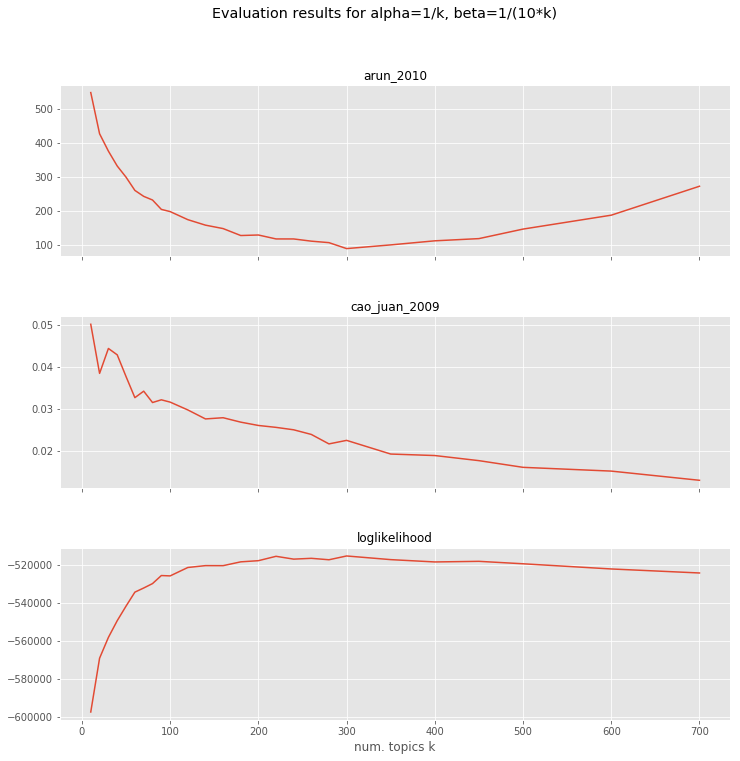

In [27]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 60 / alpha: 1/k / beta: 0.1

In [34]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=60, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=1/60, eta=0.1)

In [35]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')
(1, '0.019*"nascem" + 0.017*"bebes" + 0.013*"dois" + 0.011*"suspeita" + 0.010*"mosquitos"')
(2, '0.018*"pouco" + 0.018*"recebem" + 0.014*"kkkkk" + 0.014*"bebês" + 0.012*"óculos"')
(3, '0.019*"maioria" + 0.018*"política" + 0.014*"brasileiros" + 0.013*"vacinas" + 0.013*"crise"')
(4, '0.037*"primeira" + 0.015*"brasileira" + 0.014*"modelo" + 0.013*"mundo" + 0.009*"pode"')
(5, '0.135*"caso" + 0.092*"zika" + 0.061*"primeiro" + 0.024*"bebê" + 0.022*"vírus"')
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')
(7, '0.026*"gente" + 0.015*"nascidos" + 0.015*"recém" + 0.015*"dessa" + 0.014*"piada"')
(8, '0.061*"acho" + 0.035*"cérebro" + 0.023*"problema" + 0.015*"ainda" + 0.013*"pode"')
(9, '0.021*"acha" + 0.009*"doença" + 0.009*"pessoal" + 0.008*"agora" + 0.007*"atendimentos"')
(10, '0.036*"mutirão" + 0.027*"crianças" + 0.021*"hospital" + 0.019*"parecendo" + 0.010*"difi

In [36]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 21):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')

meu isso de microcefalia me dá uma dor


"SOCORRO!!! Zika, microcefalia, dengue, inflação, desemprego, desajuste fiscal, juros altos, alta de impostos,... https://t.co/kkYwU14HH9


https://t.co/T2Oh55tpYj   Vacina contra a Gripe Suína é a Verdadeira Causadora da        Microcefalia. Cuidado com as Vacinas. Veja Vídeo


https://t.co/eY3CmtYxXG Algo me diz que esse pedido do MPF/MG tem a ver com o surto de microcefalia. Só acho.


Mais dois mitos sobre zika e microcefalia: vacina HPV e haitianos: https://t.co/KO0b4OATnz #twitciencia


Vocês preferem ver uma criança sofrer e padecer de dor do que legalizar o aborto em casos como esse de microcefalia?


@Denise_apm @ClubeAntiPT 
No caso dessa vacinação nas gestantes, não significa que 100% das vacinadas terão feto com microcefalia.


@senhoritaelza https://t.co/7uAsZpvNyh tem outros sites tbm, jogando 'microcefalia vacina rubeola' no gugou temo

Mais de 3k de grávidas na Colômbia diagnosticadas com zika vírus: nenhum bebê com microcefalia. 

E o medo de tomar as vacina?




-----------


topico: 6
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')

#Zika #Microcefalia OMS alerta: é mais seguro não engravidar.https://t.co/82ko6Lb7SX #SaúdePública #Dengue #Epidemia https://t.co/8lEo5VXdkK


Município de São Bento em alerta contra Zica, Dengue e Microcefalia https://t.co/AJbrxpiHno https://t.co/XOSFbSuk6U


@Nubobot42 microcefalia quando nenhuma grávida toma vacina contra rubéola durante a gravidez)


@jornalnacional Enquanto tratam de dengue e microcefalia, os comunistas das FFAA estão ganhando terreno e angariando a simpatia do Militares


SUS ABANDONADO E ROUBADO PELO @ptbrasil
#TEMPORÃO
#HUMBERTOCOSTA
#PADILHA
A DENGUE EXPLODIU!
VEIO O #ZIKA A #MICROCEFALIAdoPT  #OsFILHOSdoPT


@folha Nunca vi uma Mãe infectada com Dengue gerar uma criança com problemas mais graves que uma Microcefa

UMA PERGUNTINHA @_mariadorosario  

EM QUE GOVERNO MESMO OS CASOS DE DENGUE E MICROCEFALIA AUMENTARAM?

 https://t.co/PALczHe4Pb




-----------


topico: 12
(12, '0.025*"tema" + 0.014*"tava" + 0.013*"fico" + 0.010*"redação" + 0.008*"estadual"')

perdi um irmão vítima de microcefalia, não consigo imaginar a dor dos meus pais em ver essa reportagem do Fantástico :'(


AO VIVO: Secretário do @minsaude fala dos três eixos ao combate à #dengue e #microcefalia https://t.co/SHC5BZJ3Oi


Microcefalia assusta mais que câncer e aids, reconhece secretário estadual da Saúde
@samuelvettori @RdGuaibaOficial


@WillianMar ppr isso q eu so pego gente com microcefalia


Lara estevos parabéns você é a microcefalia


Campanha da Fraternidade 2016, esse é o tema do #CaminhoscomPeJuarez , ás 22h, tudo sobre a  polêmica do aborto  com ref. a microcefalia.


R7 Mãe de gêmeos em que um tem microcefalia diz: "Tem dia que fico pensando por que um teve e outro não" R7 Lucas e… https://t.co/cOWb3t9AWC


508 caso

@VEJA Justo no momento que o Brasil está enfrentando uma epidemia de dengue, zika vírus e microcefalia? Alô MPF, tomem providências!


@samantapersotti @ro_vanja @JorgeXiada O Dr. Plínio diz que casos de microcefalia correspondem com vacinação de grávidas e mulheres férteis.


Rotas de entrada do ... - https://t.co/pCfyU5IAao  #biologia #zika #nomeiodaterra #dengue #microcefalia #olimpiadas https://t.co/xgc6RbSepe


Alguém já leu isso? Microcefalia devido a vírus da copa 2014 ou vacina da copa 2014?... https://t.co/obRBNQ5VPe


#OMS prevê testes de #vacina #antizika no mínimo em 18 meses https://t.co/qRpntpe9Bz #mosquito #Aedesaegypti #doença #saúde #microcefalia




-----------


topico: 18
(18, '0.096*"filho" + 0.023*"ajuda" + 0.017*"abortar" + 0.016*"cuidar" + 0.015*"criança"')

@Aetano foda! Aids, microcefalia, inflação alta...


Tava vendo bem estar e as criancas com microcefalia, meu é muito triste ver um bebê assim, já é ruim ver criança com gripe imagina


Tô com medo de pesqui